# Intro

Aim: To predict the regular season record of teams in the NFL

Limitations: Can only predict games on a week by week basis based off elo_ratings, weather forecasts and updated statistical differences

# Elo Data EDA/ processing

In [189]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# I started by importing some of the essential packages

nfl = "../Data/nfl_elo_all.csv"
main_df = pd.read_csv(nfl)
main_df
# Here I imported my main elo_rating dataframe, which I labelled main_df and printed this out

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,26/09/1920,1920,0,NaN,RII,STP,1503.947000,1300.000000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,03/10/1920,1920,0,NaN,CBD,PTQ,1504.688000,1300.000000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
2,03/10/1920,1920,0,NaN,CHI,MUT,1368.333000,1300.000000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
3,03/10/1920,1920,0,NaN,RII,MUN,1516.108000,1478.004000,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
4,03/10/1920,1920,0,NaN,DAY,COL,1493.002000,1504.908000,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17090,23/01/2022,2021,0,d,TB,LAR,1681.797158,1632.341105,0.659005,0.340995,...,379.027146,238.112249,199.786107,1629.446888,1635.265484,27,30,96.0,100.0,98.0
17091,23/01/2022,2021,0,d,KC,BUF,1699.470145,1683.332367,0.614689,0.385311,...,434.101421,308.598809,291.477231,1700.324756,1644.036577,42,36,100.0,100.0,100.0
17092,30/01/2022,2021,0,c,KC,CIN,1713.932369,1569.498961,0.769519,0.230481,...,153.972641,291.207245,186.971396,1674.943733,1585.098917,24,27,98.0,100.0,99.0
17093,30/01/2022,2021,0,c,LAR,SF,1651.615346,1621.465562,0.633608,0.366392,...,197.148060,204.657956,125.373817,1644.929010,1621.968494,20,17,96.0,100.0,98.0


In [190]:
mask = (main_df['season'] == 2020)
reg_season_mask = main_df['playoff'].isnull()   
elo_2020 = main_df[mask]   
elo_2020 = elo_2020[reg_season_mask]
elo_2020 = elo_2020.drop(['quality', 'importance', 'total_rating', 'neutral'], axis = 1)
elo_2020
#My aim in this project is to predict the regular season record for teams, so I dropped the playoff and superbowl data
#I also dropped some non essential columns

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,0.751961,0.248039,250.964371,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,0.352055,0.647945,216.979032,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,0.444199,0.555801,188.318387,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,0.305872,0.694128,80.105529,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,0.531452,0.468548,272.758643,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,0.309814,0.690186,224.752531,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,0.532775,0.467225,216.114816,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,0.390153,0.609847,172.799305,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,0.339926,0.660074,235.974167,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35


In [191]:
elo_2021 = pd.read_csv("../Data/nfl_elo_latest.csv", header = 0)
#This data is from the same website, but only contains the 2021 elo_data
elo_2021.drop(['quality', 'importance', 'total_rating', 'neutral'], axis = 1, inplace = True)
reg_season_mask = elo_2021['playoff'].isnull()
elo_2021 = elo_2021[reg_season_mask]
elo_2021
#I repeated the processes for the 2020 elo_data on the 2021 elo_data

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,0.736090,0.263910,317.128566,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,0.522245,0.477755,216.666972,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,0.657171,0.342829,33.684565,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,0.343427,0.656573,269.384920,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,0.635255,0.364745,17.562049,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,0.655596,0.344404,54.994140,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,0.479691,0.520309,207.911888,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,0.889954,0.110046,380.686593,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,0.405590,0.594410,84.406741,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30


# Elo_2020 EDA (checks and additions)

In [192]:
elo_2020.describe()

,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
count,256.0,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,2020.0,1506.877668,1503.553253,0.583449,0.416551,1502.858160,1507.572762,1507.830736,1507.398782,168.634752,...,0.542568,0.457432,180.770860,178.613221,169.848363,169.518611,1506.038083,1509.191434,24.816406,24.761719
std,0.0,102.209680,101.410260,0.176896,0.176896,104.280622,104.317166,96.816296,96.860519,60.926288,...,0.190760,0.190760,134.642785,140.996141,60.774286,57.620577,99.097038,100.081522,9.577009,10.148402
min,2020.0,1277.169211,1260.258714,0.171955,0.062979,1260.258714,1256.035345,1272.454637,1259.472090,0.000000,...,0.070229,0.066932,-210.655138,-215.313628,-13.569460,5.574399,1259.472090,1254.979451,0.000000,0.000000
25%,2020.0,1434.685028,1435.025201,0.454889,0.292197,1426.238406,1434.685028,1438.067378,1437.825194,125.989999,...,0.400486,0.308846,103.060474,88.225668,130.938386,128.264674,1430.500373,1440.121792,19.000000,17.000000
50%,2020.0,1509.534291,1501.547104,0.589708,0.410292,1500.695665,1504.693871,1509.122460,1510.045612,171.251819,...,0.541113,0.458887,181.086675,180.671404,173.101051,172.269047,1506.513808,1506.848359,24.500000,25.000000
75%,2020.0,1578.638773,1583.541692,0.707803,0.545111,1582.640587,1588.578397,1572.436771,1574.929520,213.996676,...,0.691154,0.599514,270.611802,275.681320,213.744357,210.675728,1578.119346,1578.436424,31.000000,31.000000
max,2020.0,1777.933310,1761.858581,0.937021,0.828045,1777.933310,1775.119369,1757.263199,1742.288173,313.828383,...,0.933068,0.929771,552.757798,600.417397,310.130678,313.828383,1757.263199,1754.511219,56.000000,49.000000


Nothing looks too skewed or unreasonable here

In [193]:
elo_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 16541 to 16796
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            256 non-null    object 
 1   season          256 non-null    int64  
 2   playoff         0 non-null      object 
 3   team1           256 non-null    object 
 4   team2           256 non-null    object 
 5   elo1_pre        256 non-null    float64
 6   elo2_pre        256 non-null    float64
 7   elo_prob1       256 non-null    float64
 8   elo_prob2       256 non-null    float64
 9   elo1_post       256 non-null    float64
 10  elo2_post       256 non-null    float64
 11  qbelo1_pre      256 non-null    float64
 12  qbelo2_pre      256 non-null    float64
 13  qb1             256 non-null    object 
 14  qb2             256 non-null    object 
 15  qb1_value_pre   256 non-null    float64
 16  qb2_value_pre   256 non-null    float64
 17  qb1_adj         256 non-null 

In [194]:
lst = list(elo_2020.columns)
for l in lst:
    print(l)

date
season
playoff
team1
team2
elo1_pre
elo2_pre
elo_prob1
elo_prob2
elo1_post
elo2_post
qbelo1_pre
qbelo2_pre
qb1
qb2
qb1_value_pre
qb2_value_pre
qb1_adj
qb2_adj
qbelo_prob1
qbelo_prob2
qb1_game_value
qb2_game_value
qb1_value_post
qb2_value_post
qbelo1_post
qbelo2_post
score1
score2


In [195]:
checks = ['qb1_value_pre', 'qb2_value_pre', 'elo1_pre', 'elo2_pre']
elo_2020[checks].describe()
#Checking my main predictors for any unlikely data... a few values of 0

,qb1_value_pre,qb2_value_pre,elo1_pre,elo2_pre
count,256.000000,256.000000,256.000000,256.000000
mean,168.634752,168.508099,1506.877668,1503.553253
std,60.926288,56.854445,102.209680,101.410260
min,0.000000,0.000000,1277.169211,1260.258714
25%,125.989999,131.245525,1434.685028,1435.025201
50%,171.251819,171.307606,1509.534291,1501.547104
75%,213.996676,207.280535,1578.638773,1583.541692
max,313.828383,310.130678,1777.933310,1761.858581


In [196]:
print(list(zip(elo_2020[elo_2020['qb1_value_pre'] <= 0].qb1, elo_2020[elo_2020['qb1_value_pre'] <= 0].qb1_value_pre)))

[('P.J. Walker', 0.0), ('Taysom Hill', 0.0), ('Kendall Hinton', 0.0)]


In [197]:
print(list(zip(elo_2020[elo_2020['qb2_value_pre'] <= 0].qb2, elo_2020[elo_2020['qb2_value_pre'] <= 0].qb2_value_pre )))

[('Brett Rypien', 0.0)]


These are all players who had not played before, explaining why they dont have an Elo_rating yet!

In [198]:
elo_2020.shape

(256, 29)

In [199]:
print("elo_2020 team_1 unique teams: " + str(len(elo_2020.team1.unique())))
print("elo_2020 team_2 unique teams: " + str(len(elo_2020.team2.unique())))
#Checking all teams are present 

elo_2020 team_1 unique teams: 32
elo_2020 team_2 unique teams: 32


In [200]:
elo_2020.isnull().sum()
#Playoff is expected to be null as it is the regular season

date                0
season              0
playoff           256
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
qbelo1_pre          0
qbelo2_pre          0
qb1                 0
qb2                 0
qb1_value_pre       0
qb2_value_pre       0
qb1_adj             0
qb2_adj             0
qbelo_prob1         0
qbelo_prob2         0
qb1_game_value      0
qb2_game_value      0
qb1_value_post      0
qb2_value_post      0
qbelo1_post         0
qbelo2_post         0
score1              0
score2              0
dtype: int64

<AxesSubplot:xlabel='team1'>

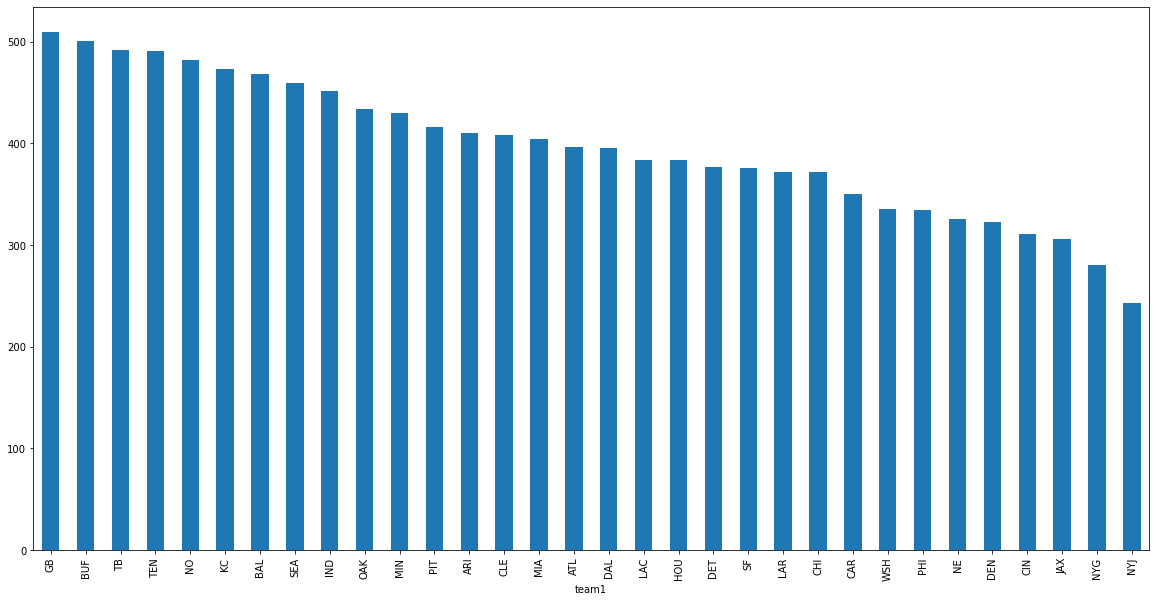

In [201]:
((elo_2020.groupby('team1')['score1'].sum()) + (elo_2020.groupby('team2')['score2'].sum())).sort_values(ascending = False).plot(kind='bar', figsize = (20,10))
#Checking which teams scored the most points

In [202]:
(((elo_2020.groupby('qb1')['qb1_value_post'].mean()) + (elo_2020.groupby('qb2')['qb2_value_post'].mean()))/2).sort_values(ascending = False)
#Most valuable Quaterbacks according to elo_ratings for 2020

Patrick Mahomes       279.848113
Dak Prescott          249.266960
Drew Brees            246.602623
Lamar Jackson         238.401861
Aaron Rodgers         237.003849
Kyler Murray          235.208861
Russell Wilson        231.078458
Josh Allen            224.141713
Deshaun Watson        223.904685
Ben Roethlisberger    212.559882
Ryan Tannehill        211.161998
Derek Carr            203.264151
Tom Brady             190.625125
Ryan Fitzpatrick      190.453261
Jared Goff            186.759202
Matt Ryan             181.241346
Justin Herbert        177.852247
Teddy Bridgewater     177.066838
Philip Rivers         171.148713
Matthew Stafford      169.114718
Kirk Cousins          157.060154
Cam Newton            152.640694
Mitchell Trubisky     146.203721
Gardner Minshew       139.778153
Nick Foles            138.739039
Baker Mayfield        137.292561
Joe Burrow            135.660948
Alex Smith            133.463721
Daniel Jones          128.571819
Carson Wentz          127.676633
Jimmy Garo

In [203]:
elo_2020['Elo-difference'] = elo_2020['elo1_pre'] - elo_2020['elo2_pre'] 
elo_2020['QB_Elo-difference'] = elo_2020['qb1_value_pre'] - elo_2020['qb2_value_pre'] 
#These are some of the predictors which I will eventually use to predict my target variable: Win(1) or Loss(0)
#A positive elo difference hence favours team1 and a negative elo difference favours team2
elo_2020

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,250.964371,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20,136.917204,44.079485
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,216.979032,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20,-44.152193,-33.869194
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,188.318387,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27,-119.995711,52.469446
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,80.105529,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17,-160.070082,-78.901087
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,272.758643,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43,-11.318579,-18.531469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,224.752531,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41,-184.846180,37.580747
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,216.114816,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32,-19.136999,-85.868351
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,172.799305,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26,-122.698170,-101.263859
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,235.974167,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35,-157.580475,-101.032328


In [204]:
elo_2020['Winner'] = (
    np.where(
        elo_2020['score1'] > elo_2020['score2'], 
        1, 
        np.where(elo_2020['score1'] < elo_2020['score2'], 0, 0)
    )
)
#I used the np.where function to create a column called Winner which displays 1 if team 1 won, or a 0 if team 2 won
#As I dont seek to predicts draws I set them to return a 0 which gives the win to team2 (away team)
#Although this may seem flawed there have only been 4 draws in the last 3 years of the NFL, so I dont believe this will skew my data 
elo_2020

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20,136.917204,44.079485,1
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20,-44.152193,-33.869194,1
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27,-119.995711,52.469446,0
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17,-160.070082,-78.901087,1
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43,-11.318579,-18.531469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41,-184.846180,37.580747,0
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32,-19.136999,-85.868351,0
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26,-122.698170,-101.263859,0
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35,-157.580475,-101.032328,0


In [205]:
print('Elo difference correlation: ' + str(elo_2020.Winner.corr(elo_2020['Elo-difference'])))
print('Quaterback Elo difference correlation: ' + str(elo_2020.Winner.corr(elo_2020['QB_Elo-difference'])))

Elo difference correlation: 0.38059954630689724
Quaterback Elo difference correlation: 0.3037567259632265


There seems to be a fairly strong positive correlation between a positive Elo_difference and a win for both QB and team

# Elo_2021 EDA (checks and additions)

In [206]:
elo_2021.describe()

,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
count,272.0,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2021.0,1506.469525,1502.801745,0.584775,0.415225,1503.311413,1505.959856,1504.710368,1500.707361,158.429115,...,0.581280,0.418720,160.363265,141.095133,158.622530,154.396180,1501.585082,1503.832646,23.838235,22.125000
std,0.0,100.584839,100.024105,0.176650,0.176650,101.496513,102.332405,94.017335,93.045509,57.807350,...,0.187426,0.187426,129.864741,142.011896,57.074368,62.196435,94.688440,96.113713,10.590479,10.057721
min,2021.0,1217.456406,1222.225724,0.125892,0.076822,1233.393097,1217.456406,1227.834387,1232.846190,3.343388,...,0.116039,0.062078,-207.503337,-293.851943,11.625346,-4.891621,1244.823574,1227.834387,0.000000,0.000000
25%,2021.0,1445.022333,1436.441523,0.471780,0.286409,1439.952941,1438.373772,1448.638616,1440.350962,119.355217,...,0.448530,0.279366,73.791355,51.899939,117.476284,116.296973,1455.080406,1440.571529,16.000000,14.750000
50%,2021.0,1513.530060,1506.387232,0.588229,0.411771,1510.387719,1514.091821,1512.922179,1507.989927,152.266934,...,0.603522,0.396478,156.636479,142.839589,152.632384,149.992519,1510.400407,1512.477584,23.000000,22.500000
75%,2021.0,1572.958579,1580.957221,0.713591,0.528220,1578.353429,1579.723471,1569.964990,1576.382372,205.644656,...,0.720634,0.551470,237.878359,227.423249,204.837493,202.511357,1574.056278,1579.503506,31.000000,30.000000
max,2021.0,1687.682015,1698.633239,0.923178,0.874108,1698.633239,1690.422283,1679.729776,1690.287674,269.532394,...,0.937922,0.883961,567.489608,492.760887,280.942209,269.532394,1690.287674,1679.791590,56.000000,51.000000


There seems to be fairly large discrepancy in qb game_value, lets dive into this 

<AxesSubplot:>

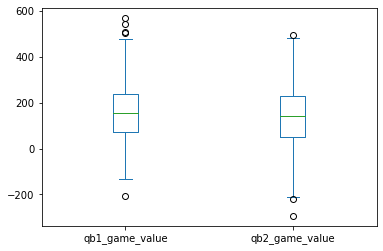

In [207]:
features = ['qb1_game_value', 'qb2_game_value']
elo_2021[features].plot(kind = 'box')

#A few outliers... lets check them 

In [208]:
list(zip(elo_2021[elo_2021['qb1_game_value'] <= -100].qb1,elo_2021[elo_2021['qb1_game_value'] <= -100].qb1_game_value, elo_2021[elo_2021['qb1_game_value'] <= -100].date ))

[('Zach Wilson', -132.33925729594284, '2021-09-19'),
 ('Daniel Jones', -101.66552071023314, '2021-10-17'),
 ('Tyrod Taylor', -101.98502153754188, '2021-12-05'),
 ('Mike Glennon', -109.46555831477244, '2021-12-19'),
 ('Ian Book', -207.50333726316643, '2021-12-27')]

Ian Book threw for 2 interceptions, 0 touchdowns and 135 yards completing 12/20 passes ending on a passer rating of 40... this value seems okay 

In [209]:
list(zip(elo_2021[elo_2021['qb2_game_value'] <= -100].qb2,elo_2021[elo_2021['qb2_game_value'] <= -100].qb2_game_value, elo_2021[elo_2021['qb2_game_value'] <= -100].date ))

[('Justin Fields', -293.85194278361166, '2021-09-26'),
 ('Zach Wilson', -152.02178338946675, '2021-09-26'),
 ('Davis Mills', -219.03444705083663, '2021-10-03'),
 ('Sam Darnold', -103.1884042017632, '2021-10-24'),
 ('Tyrod Taylor', -145.76469461361256, '2021-11-07'),
 ('Matt Ryan', -130.8700770273369, '2021-11-14'),
 ('Cam Newton', -181.28748492227604, '2021-11-28'),
 ('Trevor Lawrence', -155.50521870146176, '2021-12-12'),
 ('Jake Fromm', -127.7849765681039, '2021-12-26'),
 ('Taylor Heinicke', -111.28598938340892, '2021-12-26'),
 ('Mike Glennon', -211.14828779580424, '2022-01-02'),
 ('Sam Darnold', -106.68373692396452, '2022-01-02'),
 ('Baker Mayfield', -182.1851925550216, '2022-01-03'),
 ('Zach Wilson', -108.8632465767132, '2022-01-09')]

Justin Fields completed 6/20 passes for 68 yards and lost the game... this value seems okay

In [210]:
elo_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            272 non-null    object 
 1   season          272 non-null    int64  
 2   playoff         0 non-null      object 
 3   team1           272 non-null    object 
 4   team2           272 non-null    object 
 5   elo1_pre        272 non-null    float64
 6   elo2_pre        272 non-null    float64
 7   elo_prob1       272 non-null    float64
 8   elo_prob2       272 non-null    float64
 9   elo1_post       272 non-null    float64
 10  elo2_post       272 non-null    float64
 11  qbelo1_pre      272 non-null    float64
 12  qbelo2_pre      272 non-null    float64
 13  qb1             272 non-null    object 
 14  qb2             272 non-null    object 
 15  qb1_value_pre   272 non-null    float64
 16  qb2_value_pre   272 non-null    float64
 17  qb1_adj         272 non-null    flo

In [211]:
checks = ['qb1_value_pre', 'qb2_value_pre', 'elo1_pre', 'elo2_pre']
elo_2021[checks].describe()
#Checking feature columns to see if any data looks skewed/ misplaced

,qb1_value_pre,qb2_value_pre,elo1_pre,elo2_pre
count,272.000000,272.000000,272.000000,272.000000
mean,158.429115,155.874074,1506.469525,1502.801745
std,57.807350,61.439987,100.584839,100.024105
min,3.343388,-4.891621,1217.456406,1222.225724
25%,119.355217,117.894796,1445.022333,1436.441523
50%,152.266934,152.513611,1513.530060,1506.387232
75%,205.644656,201.555144,1572.958579,1580.957221
max,269.532394,280.942209,1687.682015,1698.633239


There appears to be a negative Elo_rating, this is possible but still fairly unlikely...

In [212]:
print(elo_2021[elo_2021['qb2_value_pre'] <= 0].qb2)
print(elo_2021[elo_2021['qb2_value_pre'] <= 0].qb2_value_pre)

120      Cooper Rush
157    Tyler Huntley
159        Tim Boyle
229        Tim Boyle
Name: qb2, dtype: object
120    0.000000
157    0.000000
159    0.000000
229   -4.891621
Name: qb2_value_pre, dtype: float64


In [213]:
elo_2021.loc[159]

date                  2021-11-21
season                      2021
playoff                      NaN
team1                        CLE
team2                        DET
elo1_pre             1522.694872
elo2_pre             1288.579125
elo_prob1               0.848367
elo_prob2               0.151633
elo1_post            1526.395846
elo2_post            1284.878151
qbelo1_pre           1539.156442
qbelo2_pre           1274.810132
qb1               Baker Mayfield
qb2                    Tim Boyle
qb1_value_pre         126.843296
qb2_value_pre                0.0
qb1_adj               -17.540584
qb2_adj              -138.391384
qbelo_prob1             0.926631
qbelo_prob2             0.073369
qb1_game_value        -50.037872
qb2_game_value        -48.916208
qb1_value_post        109.155179
qb2_value_post         -4.891621
qbelo1_post          1540.851267
qbelo2_post          1273.115307
score1                        13
score2                        10
Name: 159, dtype: object

In this game Tim Boyle threw for 2 interceptions, 77 yards and 0 touchdowns! The negative value doesn't seem implausible

In [214]:
elo_2021.shape

(272, 29)

In [215]:
print("elo_2021 team_1 unique teams: " + str(len(elo_2021.team1.unique())))
print("elo_2021 team_2 unique teams: " + str(len(elo_2021.team2.unique())))
#Checking all teams are present

elo_2021 team_1 unique teams: 32
elo_2021 team_2 unique teams: 32


In [216]:
elo_2021.isnull().sum()

date                0
season              0
playoff           272
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
qbelo1_pre          0
qbelo2_pre          0
qb1                 0
qb2                 0
qb1_value_pre       0
qb2_value_pre       0
qb1_adj             0
qb2_adj             0
qbelo_prob1         0
qbelo_prob2         0
qb1_game_value      0
qb2_game_value      0
qb1_value_post      0
qb2_value_post      0
qbelo1_post         0
qbelo2_post         0
score1              0
score2              0
dtype: int64

In [217]:
((elo_2021.groupby('team1')['score1'].sum()) + (elo_2021.groupby('team2')['score2'].sum())).sort_values(ascending = False)
#Again checking which teams scored the most points

team1
DAL    530
TB     511
BUF    483
KC     480
LAC    474
NE     462
LAR    460
CIN    460
IND    451
GB     450
ARI    449
PHI    444
SF     427
MIN    425
TEN    419
SEA    395
BAL    387
OAK    374
NO     364
CLE    349
PIT    343
MIA    341
WSH    335
DEN    335
DET    325
ATL    313
CHI    311
NYJ    310
CAR    304
HOU    280
NYG    258
JAX    253
dtype: int64

<AxesSubplot:xlabel='team1'>

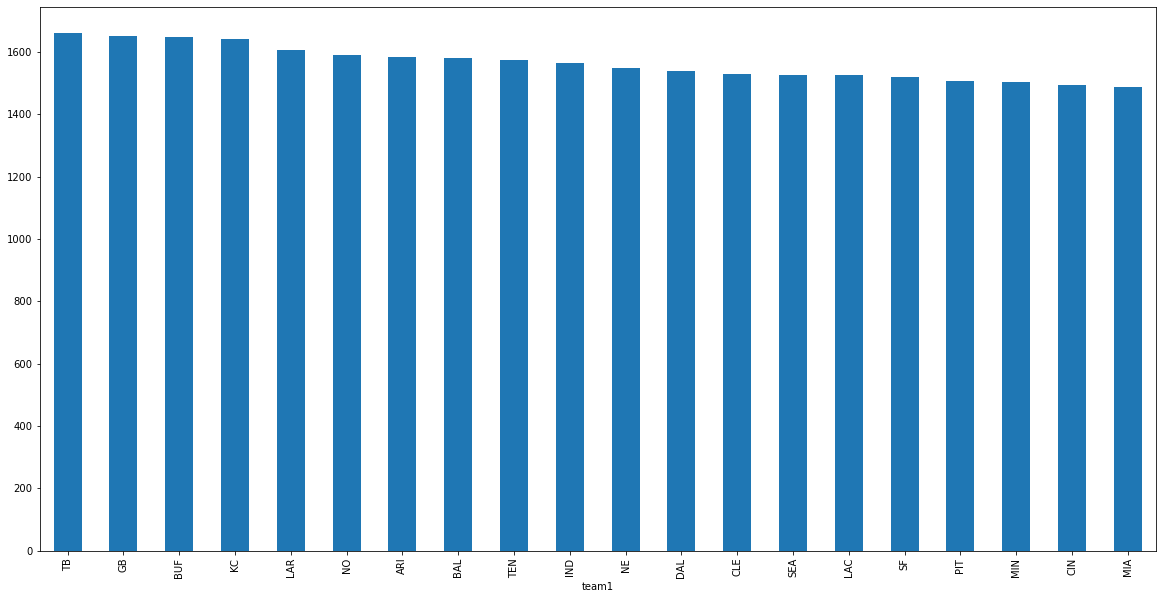

In [218]:
((elo_2021.groupby('team1')['elo1_post'].mean() + elo_2021.groupby('team2')['elo2_post'].mean())/2).sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,10))

The Buccaneers (TB) had the highest elo_ranking on average after the game, which is a good sign as they had the tied best regular season record with the Packers (GB)

<AxesSubplot:>

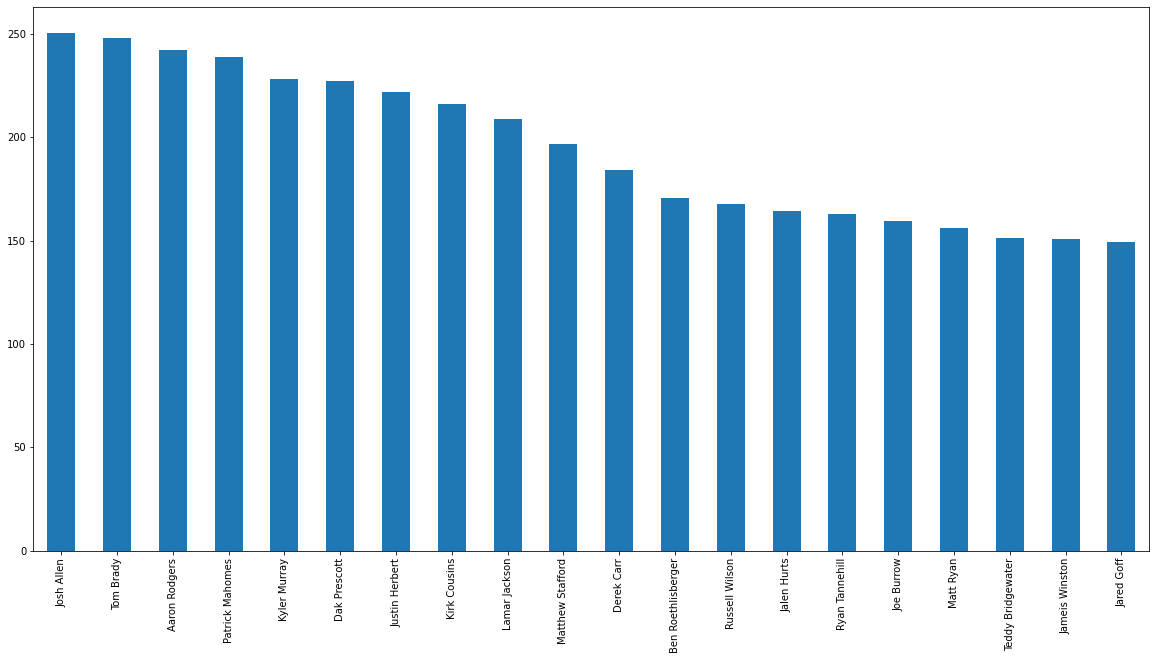

In [219]:
(((elo_2021.groupby('qb1')['qb1_value_post'].mean()) + (elo_2021.groupby('qb2')['qb2_value_post'].mean()))/2).sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,10))
#This is also a good sign that Tom brady and Aaron rodgers are in the top3 as it shows elo_rankings are a good predictor

In [220]:
(((elo_2021.groupby('qb1')['qb1_value_post'].mean()) + (elo_2021.groupby('qb2')['qb2_value_post'].mean()))/2).sort_values(ascending = False).head(20)

Josh Allen            250.503294
Tom Brady             248.066378
Aaron Rodgers         242.413552
Patrick Mahomes       238.719327
Kyler Murray          227.933006
Dak Prescott          226.961511
Justin Herbert        221.791549
Kirk Cousins          215.964699
Lamar Jackson         208.585581
Matthew Stafford      196.540658
Derek Carr            184.332726
Ben Roethlisberger    170.378104
Russell Wilson        167.758084
Jalen Hurts           164.424475
Ryan Tannehill        162.748219
Joe Burrow            159.430324
Matt Ryan             156.203587
Teddy Bridgewater     151.053673
Jameis Winston        150.797832
Jared Goff            149.411920
dtype: float64

In [221]:
elo_2021['Elo-difference'] = elo_2021['elo1_pre'] - elo_2021['elo2_pre'] 
elo_2021['QB_Elo-difference'] = elo_2021['qb1_value_pre'] - elo_2021['qb2_value_pre'] 
#These are some of the predictors which i will eventually use to predict my target variable: Win(1) or Loss(0)
elo_2021

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,317.128566,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29,203.811694,-18.081249
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,216.666972,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28,-4.261051,-84.561430
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,33.684565,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38,66.960262,-9.436454
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,269.384920,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41,-100.020702,32.890525
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,17.562049,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32,58.027645,59.066894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,54.994140,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27,81.590858,40.941109
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,207.911888,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24,-59.014006,-8.364348
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,380.686593,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17,293.607937,186.154625
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,84.406741,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30,-121.494378,32.761948


In [222]:
elo_2021['Winner'] = (
    np.where(
        elo_2021['score1'] > elo_2021['score2'], 
        1, 
        np.where(elo_2021['score1'] < elo_2021['score2'], 0, 0)
    )
)
#I used the np.where function to create a column called Winner which displays 1 if team 1 won, or a 0 if team 2 won
#As I dont seek to predicts draws I set them to return a 0 which gives the win to team2 (away team)
#This doesn't massively tarnish the data as there have only been 5 draws in the past 4 years of the NFL
elo_2021

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29,203.811694,-18.081249,1
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28,-4.261051,-84.561430,0
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38,66.960262,-9.436454,0
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41,-100.020702,32.890525,0
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32,58.027645,59.066894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27,81.590858,40.941109,0
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24,-59.014006,-8.364348,1
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17,293.607937,186.154625,1
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30,-121.494378,32.761948,0


In [223]:
print('Elo difference correlation: ' + str(elo_2021.Winner.corr(elo_2021['Elo-difference'])))
print('Quaterback Elo difference correlation: ' + str(elo_2021.Winner.corr(elo_2021['QB_Elo-difference'])))
#Again there appears to be a fairly strong positive correlation between elo_difference and wins

Elo difference correlation: 0.28482091969426676
Quaterback Elo difference correlation: 0.3236172631583046


# Stats data 

In [224]:
stats = pd.read_csv("../Data/nfl_pass_rush_receive_raw_data.csv", header = 0)
stats.drop(['player_id', 'Vegas_Line', 'Vegas_Favorite', 'Over_Under'], inplace=True, axis=1)
stats
#I imported the entire stats data for all games dating back to 2019

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,RB,Aaron Jones,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909050chi,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
3,201909050chi,WR,Davante Adams,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
4,201909050chi,TE,Jimmy Graham,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,WR,Brandon Powell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19969,202202130cin,RB,Buddy Howell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19970,202202130cin,TE,Drew Sample,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19971,202202130cin,WR,Trent Taylor,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [225]:
stats['game_date'] = pd.to_datetime(stats.game_date)
#I changed the game_date to a datetime instead of an object so that i could split the data off
start_20 = '9/10/2020'
end_20 = '1/3/2021'
#These are the dates for the regular season in 2020
mask = (stats['game_date'] >= start_20) & (stats['game_date'] <= end_20)
stats_2020 = stats[mask]
stats_2020
#As I only needed the 2020 and 2021 data I split the main dataframe into 2 so that they could be processed more easily

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
6330,202009100kan,QB,Deshaun Watson,HOU,20,32,253,1,1,4,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6331,202009100kan,RB,David Johnson,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6332,202009100kan,RB,Duke Johnson,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6333,202009100kan,WR,Will Fuller,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6334,202009100kan,TE,Jordan Akins,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,202101030tam,TE,Antony Auclair,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12646,202101030tam,WR,Jaydon Mickens,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12647,202101030tam,RB,Ke'Shawn Vaughn,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12648,202101030tam,TE,Cameron Brate,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03


In [226]:
start_21 = '9/9/2021'
end_21 = '1/9/2022'
mask = (stats['game_date'] >= start_21) & (stats['game_date'] <= end_21)
stats_2021 = stats[mask]
stats_2021
#I repeated the process to obtain the 2021 data

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
12960,202109090tam,QB,Dak Prescott,DAL,42,58,403,3,1,1,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12961,202109090tam,RB,Ezekiel Elliott,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12962,202109090tam,RB,Tony Pollard,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12963,202109090tam,WR,Amari Cooper,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12964,202109090tam,WR,CeeDee Lamb,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19667,202201090tam,TE,Ian Thomas,CAR,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19668,202201090tam,TE,Stephen Sullivan,CAR,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19669,202201090tam,WR,Cyril Grayson,TAM,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19670,202201090tam,TE,O.J. Howard,TAM,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09


# Stats 2020 EDA/ Processing

In [227]:
print(len(stats_2020.team.unique()))
stats_2020.team.unique()
#Checking all teams are present

32


array(['HOU', 'KAN', 'SEA', 'ATL', 'NYJ', 'BUF', 'LVR', 'CAR', 'CIN',
       'LAC', 'CHI', 'DET', 'IND', 'JAX', 'MIN', 'GNB', 'NOR', 'TAM',
       'NWE', 'MIA', 'DAL', 'LAR', 'CLE', 'BAL', 'SFO', 'ARI', 'WAS',
       'PHI', 'TEN', 'DEN', 'NYG', 'PIT'], dtype=object)

In [228]:
for s in stats_2020.team.unique():
    if s in(elo_2020.team1.unique()):
        print(s + str(" Is in this set"))
    else:
        print(s + str(" not found"))
#I created a for loop to check which teams were different across the dataframes     

HOU Is in this set
KAN not found
SEA Is in this set
ATL Is in this set
NYJ Is in this set
BUF Is in this set
LVR not found
CAR Is in this set
CIN Is in this set
LAC Is in this set
CHI Is in this set
DET Is in this set
IND Is in this set
JAX Is in this set
MIN Is in this set
GNB not found
NOR not found
TAM not found
NWE not found
MIA Is in this set
DAL Is in this set
LAR Is in this set
CLE Is in this set
BAL Is in this set
SFO not found
ARI Is in this set
WAS not found
PHI Is in this set
TEN Is in this set
DEN Is in this set
NYG Is in this set
PIT Is in this set


In [229]:
elo_2020.team1.unique()
#There are differences in the team names: (Such as New England: stats_2020: NWE, elo_2020: NE), so will make them all the same (I will use the elo_2020 teams)

array(['KC', 'JAX', 'DET', 'WSH', 'MIN', 'BUF', 'ATL', 'NE', 'BAL', 'CAR',
       'CIN', 'NO', 'SF', 'LAR', 'NYG', 'DEN', 'CLE', 'PIT', 'TEN', 'TB',
       'CHI', 'GB', 'IND', 'PHI', 'NYJ', 'MIA', 'DAL', 'ARI', 'HOU',
       'LAC', 'SEA', 'OAK'], dtype=object)

In [230]:
stats_2020['team'] = stats_2020['team'].replace(['HOU', 'SEA', 'NYJ', 'LVR', 'CIN', 'CHI', 'IND', 'MIN', 'NOR',
       'NWE', 'DAL', 'CLE', 'SFO', 'WAS', 'TEN', 'NYG', 'ATL', 'DET',
       'BUF', 'JAX', 'PHI', 'DEN', 'KAN', 'CAR', 'MIA', 'LAR', 'TAM',
       'GNB', 'BAL', 'ARI', 'LAC', 'PIT'], 
        ['HOU', 'SEA', 'NYJ', 'OAK', 'CIN', 'CHI', 'IND', 'MIN', 'NO', 'NE',
       'DAL', 'CLE', 'SF', 'WSH', 'TEN', 'NYG', 'ATL', 'DET', 'BUF', 'JAX',
       'PHI', 'DEN', 'KC', 'CAR', 'MIA', 'LAR', 'TB', 'GB', 'BAL',
       'ARI', 'LAC', 'PIT'])
stats_2021['team'] = stats_2021['team'].replace(['HOU', 'SEA', 'NYJ', 'LVR', 'CIN', 'CHI', 'IND', 'MIN', 'NOR',
       'NWE', 'DAL', 'CLE', 'SFO', 'WAS', 'TEN', 'NYG', 'ATL', 'DET',
       'BUF', 'JAX', 'PHI', 'DEN', 'KAN', 'CAR', 'MIA', 'LAR', 'TAM',
       'GNB', 'BAL', 'ARI', 'LAC', 'PIT'], 
        ['HOU', 'SEA', 'NYJ', 'OAK', 'CIN', 'CHI', 'IND', 'MIN', 'NO', 'NE',
       'DAL', 'CLE', 'SF', 'WSH', 'TEN', 'NYG', 'ATL', 'DET', 'BUF', 'JAX',
       'PHI', 'DEN', 'KC', 'CAR', 'MIA', 'LAR', 'TB', 'GB', 'BAL',
       'ARI', 'LAC', 'PIT'])
#I replaced both dataframes team names just for ease

In [231]:
stats_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 6330 to 12649
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_id                       6320 non-null   object        
 1   pos                           6320 non-null   object        
 2   player                        6320 non-null   object        
 3   team                          6320 non-null   object        
 4   pass_cmp                      6320 non-null   int64         
 5   pass_att                      6320 non-null   int64         
 6   pass_yds                      6320 non-null   int64         
 7   pass_td                       6320 non-null   int64         
 8   pass_int                      6320 non-null   int64         
 9   pass_sacked                   6320 non-null   int64         
 10  pass_sacked_yds               6320 non-null   int64         
 11  pass_long                 

In [232]:
stats_2020.describe()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,rec_air_yds,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,Temperature,Humidity,Wind_Speed
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,1.860127,2.850949,20.648734,0.137816,0.062500,0.179589,1.193513,3.361392,9.174858,2.182278,...,21.786044,9.428797,0.129589,32.451424,48.343354,24.847943,24.798101,63.284810,56.930380,5.490823
std,6.375475,9.664163,71.343222,0.568320,0.316331,0.738596,5.132681,11.356685,29.020078,4.667756,...,36.496896,14.676735,0.387506,21.875560,31.645811,10.205182,9.651913,14.575609,17.802709,6.142702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-31.900000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,19.000000,17.000000,19.000000,52.000000,45.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,30.000000,46.000000,25.000000,25.000000,72.000000,48.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,31.200000,14.000000,0.000000,50.000000,77.000000,31.000000,31.000000,72.000000,71.000000,8.000000
max,41.000000,61.000000,502.000000,5.000000,4.000000,8.000000,62.000000,92.000000,158.300000,34.000000,...,254.400000,141.000000,6.000000,98.000000,100.000000,49.000000,56.000000,90.000000,97.000000,35.000000


<AxesSubplot:>

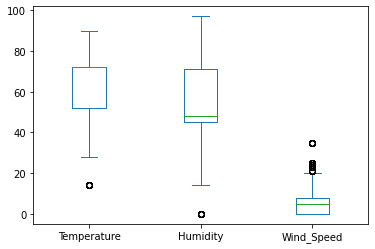

In [233]:
features = ['Temperature', 'Humidity', 'Wind_Speed']
stats_2020[features].plot(kind = 'box')
#A few games have 0 Humidity which isn't possible, so I will set these games to the median

In [234]:
stats_2020[features].describe()

,Temperature,Humidity,Wind_Speed
count,6320.000000,6320.000000,6320.000000
mean,63.284810,56.930380,5.490823
std,14.575609,17.802709,6.142702
min,14.000000,0.000000,0.000000
25%,52.000000,45.000000,0.000000
50%,72.000000,48.000000,5.000000
75%,72.000000,71.000000,8.000000
max,90.000000,97.000000,35.000000


<AxesSubplot:>

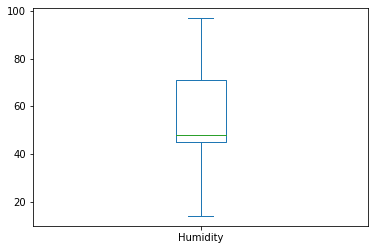

In [235]:
stats_2020['Humidity'] = (
    np.where(
    stats_2020['Humidity'] == 0, stats_2020.Humidity.median(),
       stats_2020['Humidity'])
)
stats_2020['Humidity'].plot(kind = 'box')

In [236]:
stats_2020.dtypes

game_id                object
pos                    object
player                 object
team                   object
pass_cmp                int64
                    ...      
Surface                object
Temperature             int64
Humidity              float64
Wind_Speed              int64
game_date      datetime64[ns]
Length: 65, dtype: object

In [237]:
stats_2020.isnull().sum().tail(65)
#No Null values found

game_id        0
pos            0
player         0
team           0
pass_cmp       0
              ..
Surface        0
Temperature    0
Humidity       0
Wind_Speed     0
game_date      0
Length: 65, dtype: int64

In [238]:
stats_2020.Surface.unique()
#There are 2 instances of fieldturf: one has a space, I'll merge them by replacing the spaced one

array(['astroturf', 'fieldturf', 'grass', 'sportturf', 'matrixturf',
       'fieldturf '], dtype=object)

In [239]:
stats_2020.Surface.replace('fieldturf ', 'fieldturf', inplace = True)
stats_2020.Surface.unique()

array(['astroturf', 'fieldturf', 'grass', 'sportturf', 'matrixturf'],
      dtype=object)

Below I will be adding the game stats to a list which i will eventually add to a new dataframe.
I did this by selecting a mask which would select the individual games using the game_id.unique() call. As Numeric stats such as wind and temperature are the same in this masked dataframe I just selected the first row and took the temperature from this

In [240]:
temps_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    temps_2020.append(int(masked_df.iloc[[0]].Temperature))

In [241]:
winds_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    winds_2020.append(int(masked_df.iloc[[0]].Wind_Speed))

As the iloc function doesn't return a clean output of the individual team i used the split and join function to manipulate the output to only return a single string. Admittedly this is computationally expensive, but it worked effectively.

In [242]:
from itertools import groupby
surf_2020 = []
surface_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    surf_2020.append(str(masked_df.iloc[[0]].Surface))
for s in surf_2020:
    t = s.split('\n')[0]
    res = [''.join(g) for _, g in groupby(t, str.isalpha)]
    surface_2020.append(res[1])
print(len(surface_2020))

256


In [243]:
tems = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    tems.append(str(masked_df.team.unique()))
team1 = []
team2 = []
for t in tems:
    p = t.split("'")
    x = str(p[1])
    y = str(p[3])
    team1.append(x)
    team2.append(y)
print(team2)

['KC', 'ATL', 'BUF', 'CAR', 'LAC', 'DET', 'JAX', 'GB', 'TB', 'MIA', 'LAR', 'BAL', 'ARI', 'PHI', 'DEN', 'PIT', 'CIN', 'CHI', 'MIN', 'ARI', 'DAL', 'GB', 'BAL', 'MIA', 'NYJ', 'TEN', 'LAR', 'PIT', 'LAC', 'SEA', 'TB', 'NO', 'JAX', 'ATL', 'BUF', 'CLE', 'IND', 'ARI', 'DEN', 'MIN', 'NO', 'NE', 'NYG', 'PHI', 'PIT', 'LAC', 'SEA', 'KC', 'NYJ', 'CAR', 'IND', 'CIN', 'DAL', 'DET', 'HOU', 'MIA', 'OAK', 'LAR', 'SF', 'TB', 'WSH', 'GB', 'NE', 'CHI', 'ATL', 'CLE', 'DAL', 'HOU', 'KC', 'NYJ', 'PIT', 'BAL', 'SEA', 'MIA', 'LAR', 'LAC', 'TEN', 'CAR', 'IND', 'DET', 'MIA', 'MIN', 'NE', 'NYG', 'TEN', 'BAL', 'CLE', 'SF', 'GB', 'KC', 'DAL', 'PHI', 'ATL', 'CIN', 'ARI', 'DEN', 'GB', 'NO', 'NE', 'BUF', 'TEN', 'OAK', 'LAC', 'WSH', 'LAR', 'ATL', 'BUF', 'NO', 'TEN', 'CLE', 'DEN', 'DET', 'GB', 'KC', 'LAR', 'PHI', 'PIT', 'SEA', 'NYG', 'SF', 'ATL', 'BUF', 'IND', 'ARI', 'DAL', 'JAX', 'KC', 'MIN', 'TEN', 'LAC', 'TB', 'WSH', 'NE', 'TEN', 'TB', 'CLE', 'ARI', 'DET', 'GB', 'MIA', 'NO', 'NE', 'NYG', 'PIT', 'DEN', 'LAR', 'CHI', 'S

I then created a new Dataframe to reflect these stats by zipping the lists into one DataFrame

In [244]:
statsDF_2020 = pd.DataFrame(list(zip(team1, team2, temps_2020, winds_2020, surface_2020)), columns = ['team1', 'team2', 'Temp', 'Wind_speed', 'surface'])
statsDF_2020.head()

,team1,team2,Temp,Wind_speed,surface
0,HOU,KC,56,7,astroturf
1,SEA,ATL,72,0,fieldturf
2,NYJ,BUF,67,15,astroturf
3,OAK,CAR,81,5,grass
4,CIN,LAC,83,6,grass


Below I am going to create a dummy dataframe with the different surfaces and use the .concat() function to add this back onto the main dataframe

In [245]:
dummies = pd.get_dummies(statsDF_2020.surface)
statsDF_2020 = pd.concat([statsDF_2020, dummies], axis=1)
statsDF_2020 = statsDF_2020.drop('surface', axis = 1)
statsDF_2020
#I turned the surfaces into dummy variables so that they could be used as features in my model later

,team1,team2,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf
0,HOU,KC,56,7,1,0,0,0,0
1,SEA,ATL,72,0,0,1,0,0,0
2,NYJ,BUF,67,15,1,0,0,0,0
3,OAK,CAR,81,5,0,0,1,0,0
4,CIN,LAC,83,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
251,DAL,NYG,33,6,0,1,0,0,0
252,WSH,PHI,38,10,0,0,1,0,0
253,ARI,LAR,72,0,0,0,0,1,0
254,SEA,SF,72,0,0,0,1,0,0


# Stats 2021 EDA/ Processing

In [246]:
stats_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6712 entries, 12960 to 19671
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_id                       6712 non-null   object        
 1   pos                           6712 non-null   object        
 2   player                        6712 non-null   object        
 3   team                          6712 non-null   object        
 4   pass_cmp                      6712 non-null   int64         
 5   pass_att                      6712 non-null   int64         
 6   pass_yds                      6712 non-null   int64         
 7   pass_td                       6712 non-null   int64         
 8   pass_int                      6712 non-null   int64         
 9   pass_sacked                   6712 non-null   int64         
 10  pass_sacked_yds               6712 non-null   int64         
 11  pass_long                

In [247]:
stats_2021.describe()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,rec_air_yds,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,Temperature,Humidity,Wind_Speed
count,6712.00000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,...,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000
mean,1.80587,2.787843,19.785459,0.125149,0.065554,0.185191,1.278903,3.312277,8.875313,2.159267,...,21.021752,9.391687,0.127831,32.113081,48.393325,22.085369,23.954410,63.423719,54.819726,6.043653
std,6.21226,9.458817,68.572053,0.528558,0.339861,0.753357,5.526839,11.340173,28.266075,4.741708,...,36.042059,15.015004,0.383756,21.614410,31.695094,10.115560,10.723688,14.828664,16.954135,6.342885
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-31.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12.750000,19.000000,14.000000,16.000000,53.000000,45.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,30.000000,46.000000,22.000000,23.000000,72.000000,47.000000,4.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,29.100000,14.000000,0.000000,50.000000,76.000000,30.000000,31.000000,72.000000,66.000000,11.000000
max,42.00000,64.000000,525.000000,5.000000,4.000000,9.000000,79.000000,91.000000,158.300000,35.000000,...,320.600000,153.000000,4.000000,100.000000,100.000000,51.000000,56.000000,89.000000,100.000000,27.000000


<AxesSubplot:>

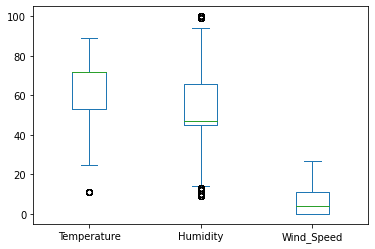

In [248]:
features = ['Temperature', 'Humidity', 'Wind_Speed']
stats_2021[features].plot(kind = 'box')
#Checking if there were any problems like in the dataframe last time, all seems okay, the humidity might contain some outliers

In [249]:
stats_2021[stats_2021['Humidity'] >= 95].home_team.unique()
#It seems that the high humidity is in Tampa, New England and Baltimore, which apparently isn't irregular 

array(['TAM', 'NWE', 'BAL'], dtype=object)

In [250]:
stats_2021.isnull().sum()

game_id        0
pos            0
player         0
team           0
pass_cmp       0
              ..
Surface        0
Temperature    0
Humidity       0
Wind_Speed     0
game_date      0
Length: 65, dtype: int64

In [251]:
stats_2021.Surface.unique()
#There are a variety of surfaces which can be grouped together: a_turf and astroturf, 'grass ' and 'grass'....

array(['grass ', 'fieldturf', 'a_turf', 'fieldturf ', 'astroturf',
       'matrixturf', 'grass', 'sportturf'], dtype=object)

In [252]:
stats_2021.Surface.replace(['grass ', 'fieldturf ', 'a_turf'], ['grass', 'fieldturf', 'astroturf'], inplace = True)
stats_2021.Surface.unique()

array(['grass', 'fieldturf', 'astroturf', 'matrixturf', 'sportturf'],
      dtype=object)

I then repeated the process I used on the 2020 statistics to obtain the 2021 statistics 

In [253]:
temps_2021 = []
for s in stats_2021.game_id.unique():
    mask = stats_2021['game_id'] == s
    masked_df = stats_2021[mask]
    temps_2021.append(int(masked_df.iloc[[0]].Temperature))
len(temps_2021)

272

In [254]:
winds_2021 = []
for s in stats_2021.game_id.unique():
    mask = stats_2021['game_id'] == s
    masked_df = stats_2021[mask]
    winds_2021.append(int(masked_df.iloc[[0]].Wind_Speed))
len(winds_2021)

272

In [255]:
tems_2021 = []
for s in stats_2021.game_id.unique():
    mask = stats_2021['game_id'] == s
    masked_df = stats_2021[mask]
    tems_2021.append(str(masked_df.team.unique()))
team1 = []
team2 = []
for t in tems_2021:
    p = t.split("'")
    x = str(p[1])
    y = str(p[3])
    team1.append(x)
    team2.append(y)
print(len(team1))

272


In [256]:
surf_2021 = []
surface_2021 = []
for s in stats_2021.game_id.unique():
    mask = stats_2021['game_id'] == s
    masked_df = stats_2021[mask]
    surf_2021.append(str(masked_df.iloc[[0]].Surface))
for s in surf_2021:
    t = s.split('\n')[0]
    res = [''.join(g) for _, g in groupby(t, str.isalpha)]
    surface_2021.append(res[1])
print(len(surface_2021))

272


In [257]:
statsDF_2021 = pd.DataFrame(list(zip(team1, team2, temps_2021, winds_2021, surface_2021)), columns = ['team1', 'team2', 'Temp', 'Wind_speed', 'surface'])
statsDF_2021.head()

,team1,team2,Temp,Wind_speed,surface
0,DAL,TB,82,9,grass
1,PHI,ATL,72,0,fieldturf
2,PIT,BUF,73,17,astroturf
3,CAR,NYJ,81,0,grass
4,MIN,CIN,81,15,fieldturf


In [258]:
dummies = pd.get_dummies(statsDF_2021.surface)
statsDF_2021 = pd.concat([statsDF_2021, dummies], axis=1)
statsDF_2021 = statsDF_2021.drop('surface', axis = 1)
statsDF_2021.head()

,team1,team2,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf
0,DAL,TB,82,9,0,0,1,0,0
1,PHI,ATL,72,0,0,1,0,0,0
2,PIT,BUF,73,17,1,0,0,0,0
3,CAR,NYJ,81,0,0,0,1,0,0
4,MIN,CIN,81,15,0,1,0,0,0


In [259]:
statsDF_2020.head()

,team1,team2,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf
0,HOU,KC,56,7,1,0,0,0,0
1,SEA,ATL,72,0,0,1,0,0,0
2,NYJ,BUF,67,15,1,0,0,0,0
3,OAK,CAR,81,5,0,0,1,0,0
4,CIN,LAC,83,6,0,0,1,0,0


# Difference DF_2020

In [260]:
diff = '../Data/nfl_output_aggregate_differences.xlsx'
diff_2020 = pd.read_excel(diff)
diff_2020.drop('Unnamed: 0', axis = 1, inplace = True)
diff_2020
# I then imported a dataframe from sportsrefernce that has the difference in statistics between the playing teams

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,Cincinnati Bengals,cin,Cleveland Browns,cle,2,0.000000,-1.000000,-1.000000,0.000000,5.000000,...,-16.000000,-12.000000,1.000000,-11.000000,-1.000000,-36.000000,-1.000000,0.000000,0.178571,0
1,New York Giants,nyg,Chicago Bears,chi,2,-1.000000,-6.000000,-1.000000,2.000000,48.000000,...,-120.000000,-49.000000,2.000000,-72.000000,2.000000,-23.000000,-11.000000,0.500000,0.351515,0
2,Minnesota Vikings,min,Indianapolis Colts,clt,2,0.000000,-2.000000,0.000000,-1.000000,-109.000000,...,46.000000,-879.000000,1.000000,-63.000000,-1.000000,-60.000000,5.000000,-0.333333,0.166667,0
3,Atlanta Falcons,atl,Dallas Cowboys,dal,2,0.000000,4.000000,1.000000,1.000000,190.000000,...,-64.000000,302.000000,-1.000000,126.000000,2.000000,22.000000,-6.000000,-0.333333,0.250000,0
4,Detroit Lions,det,Green Bay Packers,gnb,2,-1.000000,-6.000000,-1.000000,1.000000,-76.000000,...,-20.000000,-621.000000,1.000000,-96.000000,1.000000,14.000000,9.000000,-0.500000,-0.170455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Tennessee Titans,oti,Houston Texans,htx,17,0.400000,3.533333,-0.533333,0.066667,-48.533333,...,68.800000,81.733333,-1.533333,20.266667,-0.400000,10.533333,-8.000000,0.133333,0.016735,1
235,Los Angeles Chargers,sdg,Kansas City Chiefs,kan,17,-0.533333,-2.333333,0.000000,0.200000,-39.266667,...,-6.600000,53.466667,0.533333,-45.866667,0.066667,-10.866667,3.200000,-0.100000,-0.038685,1
236,Arizona Cardinals,crd,Los Angeles Rams,ram,17,-0.066667,2.333333,0.200000,-0.066667,-2.733333,...,18.733333,-126.600000,0.133333,16.000000,-0.200000,14.200000,-0.066667,0.242500,-0.031874,0
237,Seattle Seahawks,sea,San Francisco 49ers,sfo,17,0.333333,0.133333,-0.333333,-0.266667,-0.600000,...,3.133333,-61.800000,0.666667,2.533333,-0.800000,-5.266667,1.733333,0.181319,0.016670,1


In [261]:
diff_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   away_name                  239 non-null    object 
 1   away_abbr                  239 non-null    object 
 2   home_name                  239 non-null    object 
 3   home_abbr                  239 non-null    object 
 4   week                       239 non-null    int64  
 5   win_perc_dif               239 non-null    float64
 6   first_downs_dif            239 non-null    float64
 7   fumbles_dif                239 non-null    float64
 8   interceptions_dif          239 non-null    float64
 9   net_pass_yards_dif         239 non-null    float64
 10  pass_attempts_dif          239 non-null    float64
 11  pass_completions_dif       239 non-null    float64
 12  pass_touchdowns_dif        239 non-null    float64
 13  pass_yards_dif             239 non-null    float64

In [262]:
diff_2020.describe()

,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,9.623431,-0.004154,-0.035321,-0.014873,-0.011732,-3.197988,-0.403718,-0.267905,-0.036311,-3.358122,...,0.630557,-4.377427,-0.012636,-2.567431,-0.013187,-0.259605,-0.160133,-0.005610,0.003378,0.497908
std,4.702989,0.395135,3.561089,0.688450,0.613468,55.277195,6.534616,4.708524,1.051635,53.782174,...,39.834691,195.006074,1.274321,61.317948,0.710009,19.459851,9.541861,0.373666,0.088629,0.501045
min,2.000000,-1.000000,-11.250000,-3.000000,-3.000000,-207.000000,-23.000000,-17.000000,-4.000000,-208.000000,...,-120.000000,-879.000000,-7.000000,-231.500000,-3.000000,-62.500000,-56.000000,-1.000000,-0.233696,0.000000
25%,5.500000,-0.250000,-2.052399,-0.461538,-0.360390,-35.675000,-4.406818,-2.875000,-0.666667,-32.547619,...,-23.730159,-104.865079,-1.000000,-42.057692,-0.408333,-11.883117,-6.200000,-0.200000,-0.047621,0.000000
50%,10.000000,0.000000,-0.166667,0.000000,0.000000,-1.000000,-0.333333,0.000000,0.000000,-1.619048,...,-0.333333,-12.000000,0.000000,1.785714,0.000000,-0.250000,0.866667,0.000000,-0.001949,0.000000
75%,14.000000,0.256818,2.236111,0.416667,0.333333,31.392857,3.611111,2.679487,0.638889,31.625000,...,25.371429,101.111111,0.888889,31.629960,0.392308,13.000000,5.819444,0.195238,0.060100,1.000000
max,17.000000,1.000000,11.000000,2.000000,2.000000,190.000000,19.000000,13.000000,3.333333,184.000000,...,133.000000,966.000000,3.400000,188.666667,2.333333,79.000000,26.200000,1.000000,0.351515,1.000000


In [263]:
diff_2020.isnull().sum()

away_name                    0
away_abbr                    0
home_name                    0
home_abbr                    0
week                         0
win_perc_dif                 0
first_downs_dif              0
fumbles_dif                  0
interceptions_dif            0
net_pass_yards_dif           0
pass_attempts_dif            0
pass_completions_dif         0
pass_touchdowns_dif          0
pass_yards_dif               0
penalties_dif                0
points_dif                   0
rush_attempts_dif            0
rush_touchdowns_dif          0
rush_yards_dif               0
time_of_possession_dif       0
times_sacked_dif             0
total_yards_dif              0
turnovers_dif                0
yards_from_penalties_dif     0
yards_lost_from_sacks_dif    0
fourth_down_perc_dif         0
third_down_perc_dif          0
result                       0
dtype: int64

In [264]:
def upper(ht):
    return ht.upper()
diff_2020['away_abbr'] = diff_2020['away_abbr'].apply(lambda x:upper(x))
diff_2020['home_abbr'] = diff_2020['home_abbr'].apply(lambda x:upper(x))
diff_2020.head(20)
#The abbreviations were all lower case for this dataframe, which will be problematic when merging... so I updated them all to uppercase

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,Cincinnati Bengals,CIN,Cleveland Browns,CLE,2,0.0,-1.0,-1.0,0.0,5.0,...,-16.0,-12.0,1.0,-11.0,-1.0,-36.0,-1.0,0.000000,0.178571,0
1,New York Giants,NYG,Chicago Bears,CHI,2,-1.0,-6.0,-1.0,2.0,48.0,...,-120.0,-49.0,2.0,-72.0,2.0,-23.0,-11.0,0.500000,0.351515,0
2,Minnesota Vikings,MIN,Indianapolis Colts,CLT,2,0.0,-2.0,0.0,-1.0,-109.0,...,46.0,-879.0,1.0,-63.0,-1.0,-60.0,5.0,-0.333333,0.166667,0
3,Atlanta Falcons,ATL,Dallas Cowboys,DAL,2,0.0,4.0,1.0,1.0,190.0,...,-64.0,302.0,-1.0,126.0,2.0,22.0,-6.0,-0.333333,0.250000,0
4,Detroit Lions,DET,Green Bay Packers,GNB,2,-1.0,-6.0,-1.0,1.0,-76.0,...,-20.0,-621.0,1.0,-96.0,1.0,14.0,9.0,-0.500000,-0.170455,0
5,Buffalo Bills,BUF,Miami Dolphins,MIA,2,1.0,11.0,1.0,-3.0,124.0,...,11.0,966.0,2.0,135.0,-1.0,44.0,-3.0,1.000000,0.136364,1
6,San Francisco 49ers,SFO,New York Jets,NYJ,2,0.0,3.0,-1.0,-1.0,41.0,...,71.0,591.0,0.0,112.0,-2.0,-42.0,3.0,0.000000,-0.181818,1
7,Jacksonville Jaguars,JAX,Tennessee Titans,OTI,2,0.0,-9.0,0.0,0.0,-97.0,...,-39.0,-363.0,3.0,-136.0,0.0,24.0,21.0,-1.000000,0.062500,0
8,Los Angeles Rams,RAM,Philadelphia Eagles,PHI,2,1.0,4.0,-3.0,-1.0,61.0,...,96.0,299.0,-7.0,157.0,-2.0,14.0,-56.0,1.000000,0.172269,1
9,Denver Broncos,DEN,Pittsburgh Steelers,PIT,2,-1.0,0.0,1.0,0.0,8.0,...,-34.0,-264.0,-2.0,-26.0,0.0,35.0,-21.0,-1.000000,-0.200000,0


In [265]:
list(zip(diff_2020['away_abbr'].unique(), diff_2020['away_name'].unique()))
#Checking that the teams had the same names as the elo_2020 Dataframe

[('CIN', 'Cincinnati Bengals'),
 ('NYG', 'New York Giants'),
 ('MIN', 'Minnesota Vikings'),
 ('ATL', 'Atlanta Falcons'),
 ('DET', 'Detroit Lions'),
 ('BUF', 'Buffalo Bills'),
 ('SFO', 'San Francisco 49ers'),
 ('JAX', 'Jacksonville Jaguars'),
 ('RAM', 'Los Angeles Rams'),
 ('DEN', 'Denver Broncos'),
 ('CAR', 'Carolina Panthers'),
 ('WAS', 'Washington Football Team'),
 ('RAV', 'Baltimore Ravens'),
 ('KAN', 'Kansas City Chiefs'),
 ('NWE', 'New England Patriots'),
 ('NOR', 'New Orleans Saints'),
 ('MIA', 'Miami Dolphins'),
 ('CHI', 'Chicago Bears'),
 ('RAI', 'Las Vegas Raiders'),
 ('HTX', 'Houston Texans'),
 ('NYJ', 'New York Jets'),
 ('TAM', 'Tampa Bay Buccaneers'),
 ('DAL', 'Dallas Cowboys'),
 ('GNB', 'Green Bay Packers'),
 ('CRD', 'Arizona Cardinals'),
 ('CLT', 'Indianapolis Colts'),
 ('CLE', 'Cleveland Browns'),
 ('SEA', 'Seattle Seahawks'),
 ('SDG', 'Los Angeles Chargers'),
 ('PHI', 'Philadelphia Eagles'),
 ('PIT', 'Pittsburgh Steelers'),
 ('OTI', 'Tennessee Titans')]

There are quite a few differences, so I updated them all to be the same as the elo_2021 DF

In [266]:
diff_2020['away_abbr'] = diff_2020['away_abbr'].replace(['RAI', 'CLT', 'NOR', 'NWE', 'SFO', 'WAS', 'OTI', 'KAN', 'RAM', 'TAM', 'GNB', 'RAV', 'CRD', 'SDG', 'HTX'],
['OAK', 'IND', 'NO', 'NE', 'SF', 'WSH', 'TEN', 'KC', 'LAR', 'TB', 'GB', 'BAL', 'ARI', 'LAC', 'HOU'])
diff_2020['home_abbr'] = diff_2020['home_abbr'].replace(['RAI', 'CLT', 'NOR', 'NWE', 'SFO', 'WAS', 'OTI', 'KAN', 'RAM', 'TAM', 'GNB', 'RAV', 'CRD', 'SDG', 'HTX'],
['OAK', 'IND', 'NO', 'NE', 'SF', 'WSH', 'TEN', 'KC', 'LAR', 'TB', 'GB', 'BAL', 'ARI', 'LAC', 'HOU'])
list(zip(diff_2020['away_abbr'].unique(), diff_2020['away_name'].unique()))
#I updated them all to be the same using the .replace function, as I used earlier

[('CIN', 'Cincinnati Bengals'),
 ('NYG', 'New York Giants'),
 ('MIN', 'Minnesota Vikings'),
 ('ATL', 'Atlanta Falcons'),
 ('DET', 'Detroit Lions'),
 ('BUF', 'Buffalo Bills'),
 ('SF', 'San Francisco 49ers'),
 ('JAX', 'Jacksonville Jaguars'),
 ('LAR', 'Los Angeles Rams'),
 ('DEN', 'Denver Broncos'),
 ('CAR', 'Carolina Panthers'),
 ('WSH', 'Washington Football Team'),
 ('BAL', 'Baltimore Ravens'),
 ('KC', 'Kansas City Chiefs'),
 ('NE', 'New England Patriots'),
 ('NO', 'New Orleans Saints'),
 ('MIA', 'Miami Dolphins'),
 ('CHI', 'Chicago Bears'),
 ('OAK', 'Las Vegas Raiders'),
 ('HOU', 'Houston Texans'),
 ('NYJ', 'New York Jets'),
 ('TB', 'Tampa Bay Buccaneers'),
 ('DAL', 'Dallas Cowboys'),
 ('GB', 'Green Bay Packers'),
 ('ARI', 'Arizona Cardinals'),
 ('IND', 'Indianapolis Colts'),
 ('CLE', 'Cleveland Browns'),
 ('SEA', 'Seattle Seahawks'),
 ('LAC', 'Los Angeles Chargers'),
 ('PHI', 'Philadelphia Eagles'),
 ('PIT', 'Pittsburgh Steelers'),
 ('TEN', 'Tennessee Titans')]

In [267]:
diff_2020['Game_id'] = diff_2020['away_abbr'] + diff_2020['home_abbr']
def sorter(ht):
    words = []
    for s in ht:
        words.append(s)
    words.sort()
    words = ''.join(words)
    return words
diff_2020['Game_id'] = diff_2020['Game_id'].apply(lambda x:sorter(x))
diff_2020['Game_id'] = diff_2020.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
diff_2020
#I then added in the Game_id so that i can merge all the dataframes later on a common Game_id

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,Game_id
0,Cincinnati Bengals,CIN,Cleveland Browns,CLE,2,0.000000,-1.000000,-1.000000,0.000000,5.000000,...,-12.000000,1.000000,-11.000000,-1.000000,-36.000000,-1.000000,0.000000,0.178571,0,CCEILN1
1,New York Giants,NYG,Chicago Bears,CHI,2,-1.000000,-6.000000,-1.000000,2.000000,48.000000,...,-49.000000,2.000000,-72.000000,2.000000,-23.000000,-11.000000,0.500000,0.351515,0,CGHINY1
2,Minnesota Vikings,MIN,Indianapolis Colts,IND,2,0.000000,-2.000000,0.000000,-1.000000,-109.000000,...,-879.000000,1.000000,-63.000000,-1.000000,-60.000000,5.000000,-0.333333,0.166667,0,DIIMNN1
3,Atlanta Falcons,ATL,Dallas Cowboys,DAL,2,0.000000,4.000000,1.000000,1.000000,190.000000,...,302.000000,-1.000000,126.000000,2.000000,22.000000,-6.000000,-0.333333,0.250000,0,AADLLT1
4,Detroit Lions,DET,Green Bay Packers,GB,2,-1.000000,-6.000000,-1.000000,1.000000,-76.000000,...,-621.000000,1.000000,-96.000000,1.000000,14.000000,9.000000,-0.500000,-0.170455,0,BDEGT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Tennessee Titans,TEN,Houston Texans,HOU,17,0.400000,3.533333,-0.533333,0.066667,-48.533333,...,81.733333,-1.533333,20.266667,-0.400000,10.533333,-8.000000,0.133333,0.016735,1,EHNOTU2
235,Los Angeles Chargers,LAC,Kansas City Chiefs,KC,17,-0.533333,-2.333333,0.000000,0.200000,-39.266667,...,53.466667,0.533333,-45.866667,0.066667,-10.866667,3.200000,-0.100000,-0.038685,1,ACCKL2
236,Arizona Cardinals,ARI,Los Angeles Rams,LAR,17,-0.066667,2.333333,0.200000,-0.066667,-2.733333,...,-126.600000,0.133333,16.000000,-0.200000,14.200000,-0.066667,0.242500,-0.031874,0,AAILRR2
237,Seattle Seahawks,SEA,San Francisco 49ers,SF,17,0.333333,0.133333,-0.333333,-0.266667,-0.600000,...,-61.800000,0.666667,2.533333,-0.800000,-5.266667,1.733333,0.181319,0.016670,1,AEFSS2


In [268]:
diff_2020.iloc[:,5:27] = diff_2020.iloc[:,5:27].apply(lambda x: -x)
diff_2020
#The statistics were the wrong way round, a positive difference reflected an advantage for the away team in this dataframe
# However, in the other dataframes a positive is used for the home-team so I used a lambda function to reverse the stats

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,Game_id
0,Cincinnati Bengals,CIN,Cleveland Browns,CLE,2,-0.000000,1.000000,1.000000,-0.000000,-5.000000,...,12.000000,-1.000000,11.000000,1.000000,36.000000,1.000000,-0.000000,-0.178571,0,CCEILN1
1,New York Giants,NYG,Chicago Bears,CHI,2,1.000000,6.000000,1.000000,-2.000000,-48.000000,...,49.000000,-2.000000,72.000000,-2.000000,23.000000,11.000000,-0.500000,-0.351515,0,CGHINY1
2,Minnesota Vikings,MIN,Indianapolis Colts,IND,2,-0.000000,2.000000,-0.000000,1.000000,109.000000,...,879.000000,-1.000000,63.000000,1.000000,60.000000,-5.000000,0.333333,-0.166667,0,DIIMNN1
3,Atlanta Falcons,ATL,Dallas Cowboys,DAL,2,-0.000000,-4.000000,-1.000000,-1.000000,-190.000000,...,-302.000000,1.000000,-126.000000,-2.000000,-22.000000,6.000000,0.333333,-0.250000,0,AADLLT1
4,Detroit Lions,DET,Green Bay Packers,GB,2,1.000000,6.000000,1.000000,-1.000000,76.000000,...,621.000000,-1.000000,96.000000,-1.000000,-14.000000,-9.000000,0.500000,0.170455,0,BDEGT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Tennessee Titans,TEN,Houston Texans,HOU,17,-0.400000,-3.533333,0.533333,-0.066667,48.533333,...,-81.733333,1.533333,-20.266667,0.400000,-10.533333,8.000000,-0.133333,-0.016735,1,EHNOTU2
235,Los Angeles Chargers,LAC,Kansas City Chiefs,KC,17,0.533333,2.333333,-0.000000,-0.200000,39.266667,...,-53.466667,-0.533333,45.866667,-0.066667,10.866667,-3.200000,0.100000,0.038685,1,ACCKL2
236,Arizona Cardinals,ARI,Los Angeles Rams,LAR,17,0.066667,-2.333333,-0.200000,0.066667,2.733333,...,126.600000,-0.133333,-16.000000,0.200000,-14.200000,0.066667,-0.242500,0.031874,0,AAILRR2
237,Seattle Seahawks,SEA,San Francisco 49ers,SF,17,-0.333333,-0.133333,0.333333,0.266667,0.600000,...,61.800000,-0.666667,-2.533333,0.800000,5.266667,-1.733333,-0.181319,-0.016670,1,AEFSS2


In [269]:
diff_2020.loc[diff_2020['Game_id'] == 'ADIJNX1','Game_id'] = 'ADIJNX2'
diff_2020.loc[diff_2020['Game_id'] == 'CDEHIT1', 'Game_id'] = 'CDEHIT2'
diff_2020.loc[diff_2020['Game_id'] == 'HHIPSW1', 'Game_id'] = 'HHIPSW2'
diff_2020.loc[diff_2020['Game_id'] == 'BGIMN1','Game_id'] = 'BGIMN2'
diff_2020.loc[diff_2020['Game_id'] == 'BFJNUY1','Game_id'] = 'BFJNUY2'
diff_2020.loc[diff_2020['Game_id'] == 'AEIMN1','Game_id'] = 'AEIMN2'
diff_2020.loc[diff_2020['Game_id'] == 'ABCELL1','Game_id'] = 'ABCELL2'
diff_2020.loc[diff_2020['Game_id'] == 'BNOT1','Game_id'] = 'BNOT2'
diff_2020.loc[diff_2020['Game_id'] == 'AFIRS1','Game_id'] = 'AFIRS2'
#As the first week was missing from the dataframe I updated some of the Game_id's so that they would be in line with the elo_df

# Difference DF_2021

In [270]:
diff_2021 = '../Data/2021_agg_data.csv'
diff_2021 = pd.read_csv(diff_2021)
diff_2021.drop('Unnamed: 0', axis = 1, inplace = True)
diff_2021.head(20)

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,New York Giants,nyg,Washington Football Team,was,2,0.0,4.0,-2.0,0.0,121.0,...,-66.0,55.0,1.0,55.0,0.0,-9.0,11.0,-0.666667,0.200000,0.0
1,New Orleans Saints,nor,Carolina Panthers,car,2,0.0,4.0,-1.0,0.0,-119.0,...,60.0,196.0,-1.0,-59.0,-1.0,-2.0,-9.0,1.000000,0.214286,0.0
2,Cincinnati Bengals,cin,Chicago Bears,chi,2,1.0,-4.0,-1.0,-1.0,29.0,...,15.0,-23.0,2.0,44.0,-2.0,-20.0,16.0,0.666667,-0.240260,0.0
3,Houston Texans,htx,Cleveland Browns,cle,2,1.0,-2.0,-1.0,-1.0,-15.0,...,7.0,471.0,-1.0,-8.0,-2.0,20.0,-15.0,-0.750000,0.285714,0.0
4,Los Angeles Rams,ram,Indianapolis Colts,clt,2,1.0,-5.0,-1.0,0.0,89.0,...,-39.0,-661.0,-2.0,50.0,-1.0,20.0,-19.0,1.000000,0.160839,1.0
5,Denver Broncos,den,Jacksonville Jaguars,jax,2,1.0,4.0,0.0,-3.0,-64.0,...,89.0,612.0,1.0,25.0,-2.0,-31.0,-4.0,0.000000,0.193939,1.0
6,Buffalo Bills,buf,Miami Dolphins,mia,2,-1.0,6.0,4.0,-1.0,69.0,...,43.0,600.0,1.0,112.0,0.0,53.0,-1.0,0.333333,0.080808,1.0
7,New England Patriots,nwe,New York Jets,nyj,2,0.0,8.0,3.0,-1.0,61.0,...,80.0,483.0,-5.0,141.0,1.0,54.0,-38.0,-0.500000,0.379808,1.0
8,San Francisco 49ers,sfo,Philadelphia Eagles,phi,2,0.0,-3.0,0.0,0.0,50.0,...,-42.0,-269.0,0.0,8.0,2.0,-10.0,5.0,0.000000,-0.128205,1.0
9,Las Vegas Raiders,rai,Pittsburgh Steelers,pit,2,0.0,10.0,0.0,1.0,232.0,...,7.0,445.0,1.0,239.0,1.0,30.0,15.0,0.000000,0.133333,1.0


In [271]:
diff_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   away_name                  239 non-null    object 
 1   away_abbr                  239 non-null    object 
 2   home_name                  239 non-null    object 
 3   home_abbr                  239 non-null    object 
 4   week                       239 non-null    int64  
 5   win_perc_dif               239 non-null    float64
 6   first_downs_dif            239 non-null    float64
 7   fumbles_dif                239 non-null    float64
 8   interceptions_dif          239 non-null    float64
 9   net_pass_yards_dif         239 non-null    float64
 10  pass_attempts_dif          239 non-null    float64
 11  pass_completions_dif       239 non-null    float64
 12  pass_touchdowns_dif        239 non-null    float64
 13  pass_yards_dif             239 non-null    float64

In [272]:
diff_2021.describe()

,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,225.000000
mean,9.510460,-0.012765,0.090911,-0.039845,-0.014683,0.747159,0.287505,0.174653,0.026698,1.071735,...,-0.259530,4.969615,0.001503,0.487032,-0.021989,0.486119,0.324576,-0.009941,0.002444,0.484444
std,4.709067,0.362191,3.929838,0.744725,0.569456,64.090790,7.415670,5.547229,1.030057,60.891619,...,35.957841,199.499447,1.059341,65.961291,0.709834,16.879744,9.382569,0.310432,0.096291,0.500872
min,2.000000,-1.000000,-9.500000,-4.000000,-3.000000,-243.000000,-20.166667,-16.000000,-4.000000,-216.500000,...,-116.000000,-661.000000,-5.000000,-217.000000,-4.000000,-39.000000,-38.000000,-1.000000,-0.240260,0.000000
25%,5.000000,-0.198214,-2.459936,-0.400000,-0.333333,-35.527778,-4.433333,-3.773504,-0.585714,-33.590476,...,-25.722222,-118.258333,-0.683333,-39.656061,-0.387626,-11.600000,-5.215385,-0.182143,-0.060920,0.000000
50%,10.000000,0.000000,0.090909,0.000000,0.000000,-1.800000,0.428571,0.000000,0.000000,-2.133333,...,-1.111111,-4.785714,0.083333,2.000000,0.000000,0.982143,0.125000,-0.005128,-0.000758,0.000000
75%,14.000000,0.198214,2.615385,0.400000,0.333333,37.273810,5.458333,3.795330,0.666667,37.267857,...,19.787879,129.812500,0.620192,36.433333,0.348485,10.414286,5.458333,0.123046,0.057892,1.000000
max,17.000000,1.000000,17.000000,4.000000,2.500000,232.000000,24.000000,18.000000,4.000000,247.000000,...,108.000000,631.250000,3.000000,239.000000,2.000000,69.000000,43.000000,1.000000,0.442308,1.000000


In [273]:
diff_2021.isnull().sum()

away_name                     0
away_abbr                     0
home_name                     0
home_abbr                     0
week                          0
win_perc_dif                  0
first_downs_dif               0
fumbles_dif                   0
interceptions_dif             0
net_pass_yards_dif            0
pass_attempts_dif             0
pass_completions_dif          0
pass_touchdowns_dif           0
pass_yards_dif                0
penalties_dif                 0
points_dif                    0
rush_attempts_dif             0
rush_touchdowns_dif           0
rush_yards_dif                0
time_of_possession_dif        0
times_sacked_dif              0
total_yards_dif               0
turnovers_dif                 0
yards_from_penalties_dif      0
yards_lost_from_sacks_dif     0
fourth_down_perc_dif          0
third_down_perc_dif           0
result                       14
dtype: int64

In [274]:
diff_2021[diff_2021['result'].isnull()]

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
119,Baltimore Ravens,rav,Miami Dolphins,mia,10,0.527778,6.097222,-0.416667,-0.125000,43.138889,...,86.513889,355.194444,0.444444,129.652778,-0.750000,9.305556,-2.916667,0.097902,-0.052764,NaN
120,Jacksonville Jaguars,jax,Indianapolis Colts,clt,10,-0.194444,-2.638889,-0.208333,0.680556,-12.291667,...,-25.833333,-239.944444,-0.263889,-38.125000,0.638889,11.166667,-2.958333,-0.011765,-0.107533,NaN
121,Atlanta Falcons,atl,Dallas Cowboys,dal,10,-0.250000,-4.625000,-0.250000,0.000000,-33.875000,...,-62.375000,-96.000000,0.000000,-96.250000,-0.125000,-15.875000,0.125000,0.042857,-0.025599,NaN
122,Cleveland Browns,cle,New England Patriots,nwe,10,0.000000,0.444444,-0.111111,-0.444444,-18.888889,...,53.222222,89.444444,0.888889,34.555556,-0.666667,13.666667,0.888889,-0.277778,-0.044412,NaN
123,Buffalo Bills,buf,New York Jets,nyj,10,0.375000,3.625000,0.625000,-1.125000,18.625000,...,42.625000,191.625000,-1.500000,61.250000,-1.125000,14.625000,-13.500000,0.000000,0.036274,NaN
124,New Orleans Saints,nor,Tennessee Titans,oti,10,-0.152778,-2.458333,-0.041667,-0.388889,-26.263889,...,-15.888889,-148.125000,-1.375000,-42.152778,-0.458333,-10.833333,-10.416667,-0.130952,-0.053067,NaN
125,Detroit Lions,det,Pittsburgh Steelers,pit,10,-0.625000,1.625000,0.125000,0.250000,-7.750000,...,4.750000,-118.250000,0.625000,-3.000000,0.375000,5.500000,11.000000,0.017316,-0.056566,NaN
126,Tampa Bay Buccaneers,tam,Washington Football Team,was,10,0.500000,4.000000,-0.375000,-0.500000,97.000000,...,-22.500000,131.125000,-0.375000,74.500000,-0.375000,20.000000,-1.375000,-0.046053,0.143446,NaN
127,Carolina Panthers,car,Arizona Cardinals,crd,10,-0.444444,-2.777778,-0.777778,0.444444,-57.666667,...,-22.111111,-0.888889,0.555556,-79.777778,0.666667,-5.333333,-2.222222,-0.305556,-0.093803,NaN
128,Minnesota Vikings,min,Los Angeles Chargers,sdg,10,-0.250000,-2.375000,0.625000,-0.500000,-22.125000,...,22.375000,87.625000,-0.500000,0.250000,-0.375000,6.000000,-2.750000,0.019608,-0.084034,NaN


When I merge dataframes i will use the winner column from the elo_df which is complete

In [275]:
diff_2021['away_abbr'] = diff_2021['away_abbr'].apply(lambda x:upper(x))
diff_2021['home_abbr'] = diff_2021['home_abbr'].apply(lambda x:upper(x))
diff_2021.head(20)
#Again I made the abbreviations upper case 

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,New York Giants,NYG,Washington Football Team,WAS,2,0.0,4.0,-2.0,0.0,121.0,...,-66.0,55.0,1.0,55.0,0.0,-9.0,11.0,-0.666667,0.200000,0.0
1,New Orleans Saints,NOR,Carolina Panthers,CAR,2,0.0,4.0,-1.0,0.0,-119.0,...,60.0,196.0,-1.0,-59.0,-1.0,-2.0,-9.0,1.000000,0.214286,0.0
2,Cincinnati Bengals,CIN,Chicago Bears,CHI,2,1.0,-4.0,-1.0,-1.0,29.0,...,15.0,-23.0,2.0,44.0,-2.0,-20.0,16.0,0.666667,-0.240260,0.0
3,Houston Texans,HTX,Cleveland Browns,CLE,2,1.0,-2.0,-1.0,-1.0,-15.0,...,7.0,471.0,-1.0,-8.0,-2.0,20.0,-15.0,-0.750000,0.285714,0.0
4,Los Angeles Rams,RAM,Indianapolis Colts,CLT,2,1.0,-5.0,-1.0,0.0,89.0,...,-39.0,-661.0,-2.0,50.0,-1.0,20.0,-19.0,1.000000,0.160839,1.0
5,Denver Broncos,DEN,Jacksonville Jaguars,JAX,2,1.0,4.0,0.0,-3.0,-64.0,...,89.0,612.0,1.0,25.0,-2.0,-31.0,-4.0,0.000000,0.193939,1.0
6,Buffalo Bills,BUF,Miami Dolphins,MIA,2,-1.0,6.0,4.0,-1.0,69.0,...,43.0,600.0,1.0,112.0,0.0,53.0,-1.0,0.333333,0.080808,1.0
7,New England Patriots,NWE,New York Jets,NYJ,2,0.0,8.0,3.0,-1.0,61.0,...,80.0,483.0,-5.0,141.0,1.0,54.0,-38.0,-0.500000,0.379808,1.0
8,San Francisco 49ers,SFO,Philadelphia Eagles,PHI,2,0.0,-3.0,0.0,0.0,50.0,...,-42.0,-269.0,0.0,8.0,2.0,-10.0,5.0,0.000000,-0.128205,1.0
9,Las Vegas Raiders,RAI,Pittsburgh Steelers,PIT,2,0.0,10.0,0.0,1.0,232.0,...,7.0,445.0,1.0,239.0,1.0,30.0,15.0,0.000000,0.133333,1.0


In [276]:
diff_2021['away_abbr'] = diff_2021['away_abbr'].replace(['RAI', 'CLT', 'NOR', 'NWE', 'SFO', 'WAS', 'OTI', 'KAN', 'RAM', 'TAM', 'GNB', 'RAV', 'CRD', 'SDG', 'HTX'],
['OAK', 'IND', 'NO', 'NE', 'SF', 'WSH', 'TEN', 'KC', 'LAR', 'TB', 'GB', 'BAL', 'ARI', 'LAC', 'HOU'])
diff_2021['home_abbr'] = diff_2021['home_abbr'].replace(['RAI', 'CLT', 'NOR', 'NWE', 'SFO', 'WAS', 'OTI', 'KAN', 'RAM', 'TAM', 'GNB', 'RAV', 'CRD', 'SDG', 'HTX'],
['OAK', 'IND', 'NO', 'NE', 'SF', 'WSH', 'TEN', 'KC', 'LAR', 'TB', 'GB', 'BAL', 'ARI', 'LAC', 'HOU'])
list(zip(diff_2021['away_abbr'].unique(), diff_2021['away_name'].unique()))

[('NYG', 'New York Giants'),
 ('NO', 'New Orleans Saints'),
 ('CIN', 'Cincinnati Bengals'),
 ('HOU', 'Houston Texans'),
 ('LAR', 'Los Angeles Rams'),
 ('DEN', 'Denver Broncos'),
 ('BUF', 'Buffalo Bills'),
 ('NE', 'New England Patriots'),
 ('SF', 'San Francisco 49ers'),
 ('OAK', 'Las Vegas Raiders'),
 ('MIN', 'Minnesota Vikings'),
 ('ATL', 'Atlanta Falcons'),
 ('DAL', 'Dallas Cowboys'),
 ('TEN', 'Tennessee Titans'),
 ('KC', 'Kansas City Chiefs'),
 ('DET', 'Detroit Lions'),
 ('CAR', 'Carolina Panthers'),
 ('WSH', 'Washington Football Team'),
 ('CHI', 'Chicago Bears'),
 ('BAL', 'Baltimore Ravens'),
 ('LAC', 'Los Angeles Chargers'),
 ('IND', 'Indianapolis Colts'),
 ('NYJ', 'New York Jets'),
 ('MIA', 'Miami Dolphins'),
 ('SEA', 'Seattle Seahawks'),
 ('TB', 'Tampa Bay Buccaneers'),
 ('GB', 'Green Bay Packers'),
 ('PHI', 'Philadelphia Eagles'),
 ('JAX', 'Jacksonville Jaguars'),
 ('CLE', 'Cleveland Browns'),
 ('ARI', 'Arizona Cardinals'),
 ('PIT', 'Pittsburgh Steelers')]

In [277]:
diff_2021['Game_id'] = diff_2021['away_abbr'] + diff_2021['home_abbr']
def sorter(ht):
    words = []
    for s in ht:
        words.append(s)
    words.sort()
    words = ''.join(words)
    return words
diff_2021['Game_id'] = diff_2021['Game_id'].apply(lambda x:sorter(x))
diff_2021['Game_id'] = diff_2021.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
diff_2021

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,Game_id
0,New York Giants,NYG,Washington Football Team,WSH,2,0.000000,4.000000,-2.000000,0.000000,121.000000,...,55.000000,1.000000,55.000000,0.0,-9.000000,11.000000,-0.666667,0.200000,0.0,GHNSWY1
1,New Orleans Saints,NO,Carolina Panthers,CAR,2,0.000000,4.000000,-1.000000,0.000000,-119.000000,...,196.000000,-1.000000,-59.000000,-1.0,-2.000000,-9.000000,1.000000,0.214286,0.0,ACNOR1
2,Cincinnati Bengals,CIN,Chicago Bears,CHI,2,1.000000,-4.000000,-1.000000,-1.000000,29.000000,...,-23.000000,2.000000,44.000000,-2.0,-20.000000,16.000000,0.666667,-0.240260,0.0,CCHIIN1
3,Houston Texans,HOU,Cleveland Browns,CLE,2,1.000000,-2.000000,-1.000000,-1.000000,-15.000000,...,471.000000,-1.000000,-8.000000,-2.0,20.000000,-15.000000,-0.750000,0.285714,0.0,CEHLOU1
4,Los Angeles Rams,LAR,Indianapolis Colts,IND,2,1.000000,-5.000000,-1.000000,0.000000,89.000000,...,-661.000000,-2.000000,50.000000,-1.0,20.000000,-19.000000,1.000000,0.160839,1.0,ADILNR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Houston Texans,HOU,San Francisco 49ers,SF,17,-0.266667,-5.733333,-0.333333,0.200000,-52.400000,...,-155.400000,0.666667,-91.333333,0.0,-3.533333,6.933333,-0.134503,0.020035,0.0,FHOSU1
235,Los Angeles Rams,LAR,Baltimore Ravens,BAL,17,0.200000,-2.600000,-0.466667,-0.066667,31.600000,...,-258.666667,-1.600000,-3.000000,-0.2,-15.733333,-3.800000,-0.165775,0.049457,1.0,AABLLR1
236,Detroit Lions,DET,Seattle Seahawks,SEA,17,-0.190476,2.400000,0.066667,0.333333,4.000000,...,265.466667,-0.600000,9.666667,0.6,2.466667,-6.133333,0.200000,0.001264,0.0,ADEEST1
237,Minnesota Vikings,MIN,Green Bay Packers,GB,17,-0.333333,-0.933333,0.266667,0.133333,5.333333,...,-118.266667,-0.266667,18.333333,0.2,20.000000,-1.400000,-0.020468,-0.052611,0.0,BGIMN2


In [278]:
diff_2021.iloc[:,5:27] = diff_2021.iloc[:,5:27].apply(lambda x: -x)
diff_2021

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,...,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,Game_id
0,New York Giants,NYG,Washington Football Team,WSH,2,-0.000000,-4.000000,2.000000,-0.000000,-121.000000,...,-55.000000,-1.000000,-55.000000,-0.0,9.000000,-11.000000,0.666667,-0.200000,0.0,GHNSWY1
1,New Orleans Saints,NO,Carolina Panthers,CAR,2,-0.000000,-4.000000,1.000000,-0.000000,119.000000,...,-196.000000,1.000000,59.000000,1.0,2.000000,9.000000,-1.000000,-0.214286,0.0,ACNOR1
2,Cincinnati Bengals,CIN,Chicago Bears,CHI,2,-1.000000,4.000000,1.000000,1.000000,-29.000000,...,23.000000,-2.000000,-44.000000,2.0,20.000000,-16.000000,-0.666667,0.240260,0.0,CCHIIN1
3,Houston Texans,HOU,Cleveland Browns,CLE,2,-1.000000,2.000000,1.000000,1.000000,15.000000,...,-471.000000,1.000000,8.000000,2.0,-20.000000,15.000000,0.750000,-0.285714,0.0,CEHLOU1
4,Los Angeles Rams,LAR,Indianapolis Colts,IND,2,-1.000000,5.000000,1.000000,-0.000000,-89.000000,...,661.000000,2.000000,-50.000000,1.0,-20.000000,19.000000,-1.000000,-0.160839,1.0,ADILNR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Houston Texans,HOU,San Francisco 49ers,SF,17,0.266667,5.733333,0.333333,-0.200000,52.400000,...,155.400000,-0.666667,91.333333,-0.0,3.533333,-6.933333,0.134503,-0.020035,0.0,FHOSU1
235,Los Angeles Rams,LAR,Baltimore Ravens,BAL,17,-0.200000,2.600000,0.466667,0.066667,-31.600000,...,258.666667,1.600000,3.000000,0.2,15.733333,3.800000,0.165775,-0.049457,1.0,AABLLR1
236,Detroit Lions,DET,Seattle Seahawks,SEA,17,0.190476,-2.400000,-0.066667,-0.333333,-4.000000,...,-265.466667,0.600000,-9.666667,-0.6,-2.466667,6.133333,-0.200000,-0.001264,0.0,ADEEST1
237,Minnesota Vikings,MIN,Green Bay Packers,GB,17,0.333333,0.933333,-0.266667,-0.133333,-5.333333,...,118.266667,0.266667,-18.333333,-0.2,-20.000000,1.400000,0.020468,0.052611,0.0,BGIMN2


In [279]:
diff_2021.loc[diff_2021['Game_id'] == 'BFIPTU1', 'Game_id'] = 'BFIPTU2'
diff_2021.loc[diff_2021['Game_id'] == 'AHJOUX1', 'Game_id'] = 'AHJOUX2'
diff_2021.loc[diff_2021['Game_id'] == 'BGNO1','Game_id'] = 'BGNO2'
diff_2021.loc[diff_2021['Game_id'] == 'ACHILR1','Game_id' ] = 'ACHILR2'
#As this dataframe was also missing the first week i updates the Game_id's of games that occured in the first week so that they would merge to the right value

# Merging it all together and feature selection

In [280]:
elo_2020['Game_id'] = elo_2020['team1'] + elo_2020['team2']
def sorter(ht):
    words = []
    for s in ht:
        words.append(s)
    words.sort()
    words = ''.join(words)
    return words
elo_2020['Game_id'] = elo_2020['Game_id'].apply(lambda x:sorter(x))
elo_2020['Game_id'] = elo_2020.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
elo_2020
#I then created a Game_id that would be the same across each Dataframe for the season (Elo and stats)
#I did so by merging the two team names together, however teams play eachother more than once so the .join function would have been confused by two occurances
#So I used a lambda function to add on a number for how many times that game_id occurs

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner,Game_id
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,240.822204,192.365616,1663.567048,1485.102109,34,20,136.917204,44.079485,1,CHKOU1
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,131.277712,166.760627,1420.368379,1489.892671,27,20,-44.152193,-33.869194,1,ADIJNX1
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,192.712563,150.509484,1423.035870,1541.209626,23,27,-119.995711,52.469446,0,CDEHIT1
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,87.907130,142.452589,1418.873053,1513.205823,27,17,-160.070082,-78.901087,1,HHIPSW1
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,169.663822,207.789554,1519.869687,1580.152199,34,43,-11.318579,-18.531469,0,BGIMN1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,249.061903,216.955557,1371.350492,1571.696393,38,41,-184.846180,37.580747,0,EHNOTU2
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,115.047966,184.371418,1429.251280,1466.642505,31,32,-19.136999,-85.868351,0,ADEKNO2
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,109.845697,199.502627,1503.272522,1619.654067,23,26,-122.698170,-101.263859,0,AEFSS2
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,164.839330,266.649955,1497.160456,1674.786093,16,35,-157.580475,-101.032328,0,BCGHI2


In [281]:
elo_2021['Game_id'] = elo_2021['team1'] + elo_2021['team2']
elo_2021['Game_id'] = elo_2021['Game_id'].apply(lambda x:sorter(x))
elo_2021['Game_id'] = elo_2021.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
elo_2021

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner,Game_id
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,223.782352,248.082791,1639.815956,1500.264612,31,29,203.811694,-18.081249,1,ABDLT1
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,113.888998,192.992819,1500.541394,1580.083300,16,28,-4.261051,-84.561430,0,ADEINS1
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,190.370826,225.696909,1489.651053,1528.361042,13,38,66.960262,-9.436454,0,AEINRT1
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,171.513676,132.495404,1355.200609,1562.414869,33,41,-100.020702,32.890525,0,DEFST1
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,162.493070,145.813648,1418.481268,1475.793058,6,32,58.027645,59.066894,0,AHILPT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,169.067416,140.972144,1597.459409,1580.112822,24,27,81.590858,40.941109,0,AFLRS2
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,130.904079,133.263355,1546.397530,1568.228525,33,24,-59.014006,-8.364348,1,AEIMN2
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,254.971182,66.767113,1639.622429,1356.555640,41,17,293.607937,186.154625,1,ABCRT2
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,118.434721,88.802173,1397.080391,1578.642541,20,30,-121.494378,32.761948,0,ALNOT2


In [282]:
statsDF_2020['Game_id'] = statsDF_2020['team1'] + statsDF_2020['team2']
statsDF_2020['Game_id'] = statsDF_2020['Game_id'].apply(lambda x:sorter(x))
statsDF_2020['Game_id'] = statsDF_2020.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
statsDF_2020

,team1,team2,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf,Game_id
0,HOU,KC,56,7,1,0,0,0,0,CHKOU1
1,SEA,ATL,72,0,0,1,0,0,0,AAELST1
2,NYJ,BUF,67,15,1,0,0,0,0,BFJNUY1
3,OAK,CAR,81,5,0,0,1,0,0,AACKOR1
4,CIN,LAC,83,6,0,0,1,0,0,ACCILN1
...,...,...,...,...,...,...,...,...,...,...
251,DAL,NYG,33,6,0,1,0,0,0,ADGLNY2
252,WSH,PHI,38,10,0,0,1,0,0,HHIPSW2
253,ARI,LAR,72,0,0,0,0,1,0,AAILRR2
254,SEA,SF,72,0,0,0,1,0,0,AEFSS2


In [283]:
statsDF_2021['Game_id'] = statsDF_2021['team1'] + statsDF_2021['team2']
statsDF_2021['Game_id'] = statsDF_2021['Game_id'].apply(lambda x:sorter(x))
statsDF_2021['Game_id'] = statsDF_2021.groupby('Game_id').Game_id.apply(lambda n: n + (np.arange(len(n))+1).astype(str))
statsDF_2021

,team1,team2,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf,Game_id
0,DAL,TB,82,9,0,0,1,0,0,ABDLT1
1,PHI,ATL,72,0,0,1,0,0,0,AHILPT1
2,PIT,BUF,73,17,1,0,0,0,0,BFIPTU1
3,CAR,NYJ,81,0,0,0,1,0,0,ACJNRY1
4,MIN,CIN,81,15,0,1,0,0,0,CIIMNN1
...,...,...,...,...,...,...,...,...,...,...
267,NYG,WSH,38,0,0,1,0,0,0,GHNSWY2
268,LAC,OAK,72,0,0,0,1,0,0,AACKLO2
269,LAR,SF,72,0,0,0,0,1,0,AFLRS2
270,PIT,BAL,36,0,0,0,1,0,0,ABILPT2


In [284]:
elo_2020 = pd.merge(elo_2020, statsDF_2020, on="Game_id", how="left")
elo_2020.drop(['team1_y', 'team2_y'], axis = 1, inplace = True)
elo_2020.head(30)
#Once all the dataframes had a common Game_id to merge on i combined the dataframes into a 2020 and a 2021 dataframe
#I will be using the 2020 dataframe to train my data, and the 2021 to test my data

,date,season,playoff,team1_x,team2_x,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,QB_Elo-difference,Winner,Game_id,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf
0,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,44.079485,1,CHKOU1,56,7,1,0,0,0,0
1,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,-33.869194,1,ADIJNX1,80,3,0,0,1,0,0
2,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,52.469446,0,CDEHIT1,72,0,0,1,0,0,0
3,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,-78.901087,1,HHIPSW1,76,5,0,0,1,0,0
4,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,-18.531469,0,BGIMN1,72,0,0,0,0,0,1
5,13/09/2020,2020,NaN,BUF,NYJ,1511.354591,1458.063206,0.663948,0.336052,1526.648580,...,19.054285,1,BFJNUY1,67,15,1,0,0,0,0
6,13/09/2020,2020,NaN,ATL,SEA,1534.515566,1546.899069,0.575148,0.424852,1503.414791,...,-13.595426,0,AAELST1,72,0,0,1,0,0,0
7,13/09/2020,2020,NaN,NE,MIA,1581.531105,1413.919341,0.792329,0.207671,1590.538229,...,-25.399956,1,AEIMN1,70,8,0,0,1,0,0
8,13/09/2020,2020,NaN,BAL,CLE,1638.430875,1440.533332,0.819559,0.180441,1649.702251,...,131.086484,1,ABCELL1,76,5,0,0,1,0,0
9,13/09/2020,2020,NaN,CAR,OAK,1417.735566,1437.326108,0.564980,0.435020,1399.166282,...,-26.188963,0,AACKOR1,81,5,0,0,1,0,0


In [285]:
elo_2020 = pd.merge(elo_2020, diff_2020, on="Game_id", how="left")
elo_2020.head(20)
#I'm now going to add in the differences DF


,date,season,playoff,team1_x,team2_x,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13/09/2020,2020,NaN,BUF,NYJ,1511.354591,1458.063206,0.663948,0.336052,1526.648580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13/09/2020,2020,NaN,ATL,SEA,1534.515566,1546.899069,0.575148,0.424852,1503.414791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13/09/2020,2020,NaN,NE,MIA,1581.531105,1413.919341,0.792329,0.207671,1590.538229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13/09/2020,2020,NaN,BAL,CLE,1638.430875,1440.533332,0.819559,0.180441,1649.702251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13/09/2020,2020,NaN,CAR,OAK,1417.735566,1437.326108,0.564980,0.435020,1399.166282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
elo_2021 = pd.merge(elo_2021, statsDF_2021, on="Game_id", how="left")
elo_2021.drop(['team1_y', 'team2_y'], axis = 1, inplace = True)
elo_2021.head(10)

,date,season,playoff,team1_x,team2_x,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,QB_Elo-difference,Winner,Game_id,Temp,Wind_speed,astroturf,fieldturf,grass,matrixturf,sportturf
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,-18.081249,1,ABDLT1,82,9,0,0,1,0,0
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,-84.561430,0,ADEINS1,72,0,0,1,0,0,0
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,-9.436454,0,AEINRT1,82,8,0,0,1,0,0
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,32.890525,0,DEFST1,72,0,0,1,0,0,0
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,59.066894,0,AHILPT1,72,0,0,1,0,0,0
5,2021-09-12,2021,NaN,CIN,MIN,1412.119826,1494.522721,0.474976,0.525024,1426.792646,...,-45.635918,1,CIIMNN1,81,15,0,1,0,0,0
6,2021-09-12,2021,NaN,BUF,PIT,1634.003861,1526.420324,0.729773,0.270227,1601.069885,...,25.615256,0,BFIPTU1,73,17,1,0,0,0,0
7,2021-09-12,2021,NaN,CAR,NYJ,1436.539318,1381.747500,0.665873,0.334127,1447.894527,...,-7.976543,1,ACJNRY1,81,0,0,0,1,0,0
8,2021-09-12,2021,NaN,WSH,LAC,1463.233796,1496.945335,0.544906,0.455094,1445.440885,...,-1.224664,0,ACHLSW1,81,4,0,0,1,0,0
9,2021-09-12,2021,NaN,HOU,JAX,1432.775542,1339.023563,0.713787,0.286213,1447.902046,...,7.567062,1,AHJOUX1,72,0,1,0,0,0,0


In [287]:
elo_2021 = pd.merge(elo_2021, diff_2021, on="Game_id", how="left")
elo_2021.head(20)

,date,season,playoff,team1_x,team2_x,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-09-12,2021,NaN,CIN,MIN,1412.119826,1494.522721,0.474976,0.525024,1426.792646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-09-12,2021,NaN,BUF,PIT,1634.003861,1526.420324,0.729773,0.270227,1601.069885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-09-12,2021,NaN,CAR,NYJ,1436.539318,1381.747500,0.665873,0.334127,1447.894527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-09-12,2021,NaN,WSH,LAC,1463.233796,1496.945335,0.544906,0.455094,1445.440885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-09-12,2021,NaN,HOU,JAX,1432.775542,1339.023563,0.713787,0.286213,1447.902046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
elo_2021 = elo_2021.fillna(0)
elo_2020 = elo_2020.fillna(0)
#The first week has no differences in any statistics, so I will set this to 0
#There was also no data for the last week, so I will drop this from my dataset
elo_2021 = elo_2021.loc[:255]

In [289]:
print(len(elo_2020))
print(len(elo_2021))
#Just checking that the data is the expected length (16 games per team/2 as each team needs an opponent... so these values look right)

256
256


# Fitting and Boosting Data

In [290]:
feature_names = ['Elo-difference', 'QB_Elo-difference','Temp', 'win_perc_dif',
 'pass_touchdowns_dif',
 'pass_yards_dif',
 'turnovers_dif',
 'total_yards_dif'
                ]
X_train = elo_2020[feature_names]
y_train = elo_2020.Winner
X_test = elo_2021[feature_names]
y_test = elo_2021.Winner
#I noticed here that the playing surface and Humidity had a larger coefficient than expected
# this seems more incidental rather than an actual correlation... so i dropped them as features

In [291]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = np.round(lr.predict(X_test)) #The y_pred needs to be rounded, as wins/ loses are only reflected in a binary numbers (1/0)
#I first tried using a linear regression model to predict the outcome for 2021

In [292]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.round(y_pred)) * 100

66.015625

66% Accuracy isn't a bad start but we'll see if it can be improved

In [293]:
list(zip(feature_names, lr.coef_))
#Checking which features are driving the predictive model

[('Elo-difference', 0.0006313526454037327),
 ('QB_Elo-difference', 0.0007206953023990287),
 ('Temp', -0.0008162997860501586),
 ('win_perc_dif', 0.12228810951106482),
 ('pass_touchdowns_dif', 0.04384567190108962),
 ('pass_yards_dif', -0.0010375559184864116),
 ('turnovers_dif', 0.017200466392243905),
 ('total_yards_dif', 0.0006018320686610935)]

It looks like Win percent difference and turnovers are playing the most important factors in determining outcome here

In [294]:
from sklearn.linear_model import Ridge
#I started out with Ridge regression trying different alpha's to see which would give me the highest accuracy rating

alphalist = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
for a in alphalist:
    ridgereg = Ridge(alpha=a, normalize = True)

    ridgereg.fit(X_train, y_train)

    y_pred = ridgereg.predict(X_test)
    print('Alpah: ' + str(a))
    print('Accuracy score: ' + str(round(accuracy_score(y_test,np.round(y_pred))*100,2)) + str('%\n'))

Alpah: 0
Accuracy score: 66.02%

Alpah: 0.1
Accuracy score: 66.02%

Alpah: 0.2
Accuracy score: 64.84%

Alpah: 0.3
Accuracy score: 64.06%

Alpah: 0.4
Accuracy score: 63.28%

Alpah: 0.5
Accuracy score: 62.89%

Alpah: 0.6
Accuracy score: 63.28%

Alpah: 0.7
Accuracy score: 63.67%

Alpah: 0.8
Accuracy score: 64.06%

Alpah: 0.9
Accuracy score: 64.45%

Alpah: 1
Accuracy score: 64.06%



66.02% is not an improvement, so I'll keep trying to up it

In [295]:
from sklearn import linear_model
alphalist = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
#Next i tried a Lasso regression tracking different alphas to see if any of these would increase accuracy score
for a in alphalist:
    clf = linear_model.Lasso(alpha=a)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print('Alpah: ' + str(a))
    print('Accuracy score: ' + str(round(accuracy_score(y_test,np.round(y_pred))*100,2)) + str('%\n'))

Alpah: 0
Accuracy score: 66.02%

Alpah: 0.1
Accuracy score: 67.58%

Alpah: 0.2
Accuracy score: 66.02%

Alpah: 0.3
Accuracy score: 66.41%

Alpah: 0.4
Accuracy score: 66.02%

Alpah: 0.5
Accuracy score: 66.02%

Alpah: 0.6
Accuracy score: 66.41%

Alpah: 0.7
Accuracy score: 66.41%

Alpah: 0.8
Accuracy score: 66.41%

Alpah: 0.9
Accuracy score: 66.02%

Alpah: 1
Accuracy score: 66.02%



67.58% is the best yet but I'll try a few more

In [296]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Next I tried a Gradient boosting classifier 
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[00:04:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 64.06%


This one made it worse, so I'll try a few more

In [297]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
#Finally i tried another Gradient booster using a variety of different learning rates
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=3, max_depth=3, random_state = 100)
    #I chose a higher n_estimators to avoid over fitting 
    #I also set a random state, as the estimators change, meaning that the accuracy changes
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print('Learning rate: ' + str(learning_rate))
    print("Accuracy: %.2f%% \n" % (accuracy * 100.0))

Learning rate: 0.05
Accuracy: 63.67% 

Learning rate: 0.075
Accuracy: 64.45% 

Learning rate: 0.1
Accuracy: 66.02% 

Learning rate: 0.25
Accuracy: 68.75% 

Learning rate: 0.5
Accuracy: 64.45% 

Learning rate: 0.75
Accuracy: 64.45% 

Learning rate: 1
Accuracy: 61.33% 



69% is a much better improvement, so I will use this one

In [298]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_features=3, max_depth=3, random_state = 100)
gb_clf.fit(X_train, y_train)
y_pred = np.round(gb_clf.predict(X_test))
elo_2021['Predicted'] = y_pred
elo_2021['Actual'] = y_test
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[87 37]
 [43 89]]


176 Correct predictions
80 Wrong predictions (Evenly distributed between False negatives and False positives)

In [299]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       124
           1       0.71      0.67      0.69       132

    accuracy                           0.69       256
   macro avg       0.69      0.69      0.69       256
weighted avg       0.69      0.69      0.69       256



0.69 f1 score is adequate

In [300]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.6879276637341154


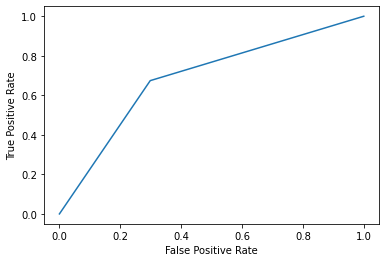

In [301]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [302]:
elo_2021['Team_p'] = (
    np.where(
    elo_2021['Predicted'] == 1, elo_2021['team1_x'],
        np.where(elo_2021['Predicted'] == 0, elo_2021['team2_x'], 'NA')
        )
)

elo_2021['Team_a'] = (
    np.where(
    elo_2021['Actual'] == 1, elo_2021['team1_x'],
        np.where(elo_2021['Actual'] == 0, elo_2021['team2_x'], 'NA')
        )
)

elo_2021
#I then added 2 new columns onto the 2021 elo dataframe, one for the predicted result and another for the actual result

,date,season,playoff,team1_x,team2_x,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,Predicted,Actual,Team_p,Team_a
0,2021-09-09,2021,0,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,1,TB,TB
1,2021-09-12,2021,0,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,SEA,SEA
2,2021-09-12,2021,0,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,TEN,ARI
3,2021-09-12,2021,0,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,SF,SF
4,2021-09-12,2021,0,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,ATL,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-01-02,2021,0,NO,CAR,1534.838390,1379.609357,0.780356,0.219644,1543.612249,...,-0.466667,-7.400000,-3.200000,0.121429,-0.017174,0.0,1,1,NO,NO
252,2022-01-02,2021,0,DAL,ARI,1600.956533,1525.803448,0.691424,0.308576,1580.481822,...,0.333333,4.800000,-7.666667,-0.086316,-0.017825,1.0,0,0,ARI,ARI
253,2022-01-02,2021,0,SEA,DET,1496.641457,1326.769033,0.794462,0.205538,1508.287397,...,-0.600000,-2.466667,6.133333,-0.200000,-0.001264,0.0,1,1,SEA,SEA
254,2022-01-02,2021,0,GB,MIN,1679.743906,1514.681059,0.789904,0.210096,1692.419962,...,-0.200000,-20.000000,1.400000,0.020468,0.052611,0.0,0,1,MIN,GB


In [303]:
for t in elo_2021['team1_x'].unique():
    mask = elo_2021['Team_p'] == t
    mask2 = elo_2021['Team_a'] == t
    print(t + " are predicted to have a record of : " + str(len(elo_2021[mask])) + "-" + str(16-len(elo_2021[mask])))
    print(t + " actually had a record of : " + str(len(elo_2021[mask2])) + "-" + str(16-len(elo_2021[mask2])) +'\n')
 # Using a for loop that subtracted the number of games played (16) i printed out the predicted and the actual results for each team   

TB are predicted to have a record of : 14-2
TB actually had a record of : 12-4

IND are predicted to have a record of : 8-8
IND actually had a record of : 9-7

TEN are predicted to have a record of : 9-7
TEN actually had a record of : 11-5

DET are predicted to have a record of : 2-14
DET actually had a record of : 3-13

ATL are predicted to have a record of : 5-11
ATL actually had a record of : 7-9

CIN are predicted to have a record of : 9-7
CIN actually had a record of : 10-6

BUF are predicted to have a record of : 14-2
BUF actually had a record of : 10-6

CAR are predicted to have a record of : 7-9
CAR actually had a record of : 5-11

WSH are predicted to have a record of : 3-13
WSH actually had a record of : 6-10

HOU are predicted to have a record of : 3-13
HOU actually had a record of : 4-12

NYG are predicted to have a record of : 2-14
NYG actually had a record of : 4-12

KC are predicted to have a record of : 9-7
KC actually had a record of : 11-5

NO are predicted to have a 

In [304]:
team = []
team_actual = []
team_predicted = []
for t in elo_2021.team1_x.unique():
    team.append(t) 
    team_actual.append(len(elo_2021[elo_2021['Team_a'] == t]))
    team_predicted.append(len(elo_2021[elo_2021['Team_p'] == t]))
acc = pd.DataFrame(list(zip(team,team_actual,team_predicted)), columns = ['team', 'team_acc', 'team_pred'])
acc = acc.set_index('team')
acc = acc.sort_values('team_pred', ascending = False)
acc
#I then created an alternate dataframe to compare the predicted against the actual values

,team_acc,team_pred
team,,
TB,12,14
BUF,10,14
LAR,12,13
GB,13,13
BAL,8,13
ARI,11,12
LAC,9,11
DAL,11,11
MIN,7,10


<AxesSubplot:xlabel='team'>

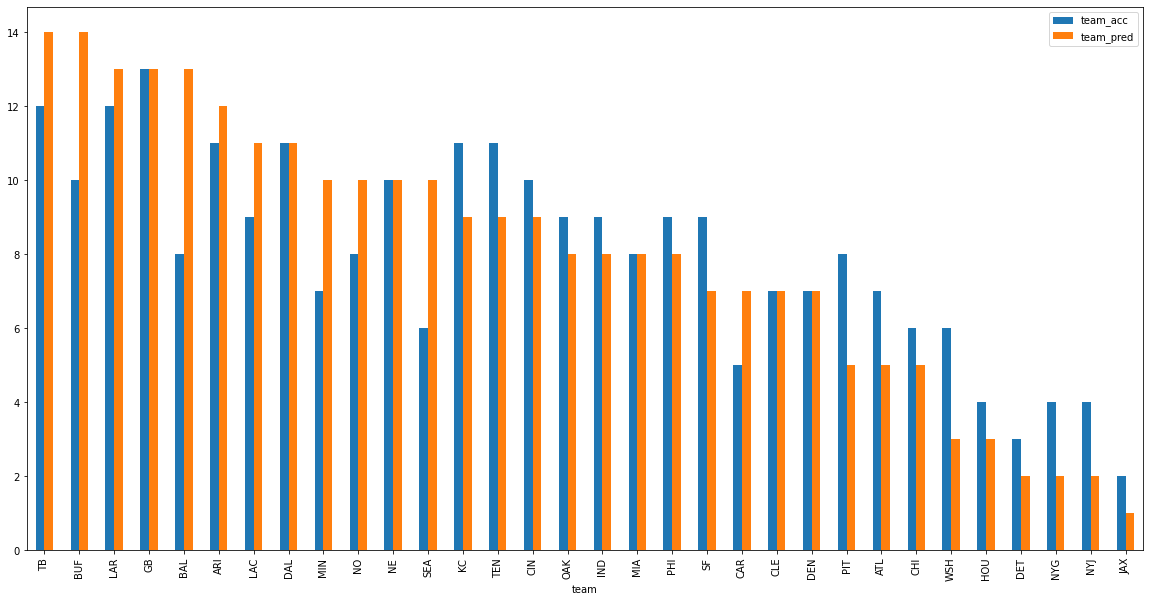

In [305]:
acc.plot(kind = 'bar', figsize = (20,10))
#I then plotted a comparison of the actual results against the predicted results

In [306]:
acc['team_diff'] = abs(acc['team_acc'] - acc['team_pred'])
acc.sort_values('team_diff')
#I then created a difference column to see how accurate the model was, i wasn't interested in negative values so i used the abs function

,team_acc,team_pred,team_diff
team,,,
GB,13,13,0
DEN,7,7,0
CLE,7,7,0
DAL,11,11,0
MIA,8,8,0
NE,10,10,0
OAK,9,8,1
DET,3,2,1
HOU,4,3,1


In [307]:
acc['team_diff'].mean()

1.625

In [308]:
len(acc[acc['team_diff'] <= 2])

26

On average the end of season record was off by roughly 2 results

# Conclusion

My model predicted the season of 26 teams to within a difference of 2 (That's 81% of teams), and predicted 6 spot on

On average the end of season record was off by roughly 2 results

However: The model did however have a few misses (Baltimore, Buffalo, PIT were all above 4)